# Assignment 1 - ML DATA CLEANING AND FEATURE SELECTION


Name: Sai Pranavi Jeedigunta

NUID: 002415588

# Variable Description


restaurant: The fast food restaurants.

item: The list of food items available at the fast food restaurants.

calories: The amount of calories in each item.

cal_fat: The amount of calories from fat in each item.

total_fat: The amount of total fat in each item.

sat_fat: The amount of saturated fat in each item.

trans_fat: The amount of trans fat in each item.

cholesterol: The amount of cholestrol in each item.

sodium: The amount of sodium in each item.

total_carb: The amount of total carbohydrated in each item.

fiber: The amount of fiber in each item.

sugar: The amount of sugar in each item.

protein: The amount of protien in each item.

vit_a: The amount of Vitamin A in each item.

vit_c: The amount of Vitamin C in each item.

calcium: The amount of Calcium in each item.

salad: Determines if the item is a salad or not.





# Installing Dependencies

In [ ]:
#installing dependencies
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

#Import Libraries

# Data Manipulation
!pip install fitter
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats as stats

# Data Visualization
!pip install shap
import seaborn as sns
import matplotlib.pyplot as plt
import shap

shap.initjs()

# Figure Size
plt.figure(figsize=(18, 14), dpi=80)
sns.set(rc={"figure.figsize": (18, 14)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE
from fancyimpute import KNN

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance


<Figure size 1440x1120 with 0 Axes>

# Reading and Studying the Data

In [ ]:
#Reading the fastfood dataset
data = pd.read_csv("https://raw.githubusercontent.com/SaiPranaviJeedigunta/DEMG_assignments/main/DSEM_0022415588/fastfood.csv")

In [ ]:
#Viewing data in the file
data.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0   20.0     20.0  Other  
1     18     46.0    6.0   20.0     20.0  Other  
2     18     70.0   10.0   20.0     50.0  Other  
3     18     55.0    6.0   25.0     20.0  Other  
4     18     46.0    6.0   20.0     20.0  Other

In [ ]:
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("\n")
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['restaurant', 'item', 'salad']


Numerical Columns :  ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


# Question 1: What are the data types? (Numeric and Categorical)

**ANSWER:**

Categorical Columns : ['restaurant', 'item', 'salad']


Numerical Columns :  ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']


In [ ]:
num_cols = data._get_numeric_data().columns
num_cols, len(num_cols)

(Index(['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
        'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
        'vit_a', 'vit_c', 'calcium'],
       dtype='object'),
 14)

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['restaurant', 'item', 'salad'], 3)

# Question 5: Which independent variables have missing data? How much?



In [ ]:
#checking if the any data is missing
data.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

Answer: Five independent variables have missing data. They are:
1. fiber - 12
2. protein - 1
3. vit_a - 214
4. vit_c - 210
5. calcium - 210


# Question 2: Are there any Missing Values

Yes, there are missing values in the variables: fiber,protien,Vitamin A, Vitamin C, Calcium. Replaced missing values by imputing the values with mean of the column.

In [ ]:
# Calculate the mean for each restaurant and then fill the NAN value with the mean
vit_c_mean_by_restaurant = data.groupby('restaurant')['vit_c'].transform('mean')
vit_a_mean_by_restaurant = data.groupby('restaurant')['vit_a'].transform('mean')
calcium_mean_by_restaurant = data.groupby('restaurant')['calcium'].transform('mean')
fiber_mean_by_restaurant = data.groupby('restaurant')['fiber'].transform('mean')
protein_mean_by_restaurant = data.groupby('restaurant')['protein'].transform('mean')

# Fill NaN values for each restaurant with the mean value using .loc
data.loc[data['vit_c'].isna(), 'vit_c'] = vit_c_mean_by_restaurant.round(2)
data.loc[data['vit_a'].isna(), 'vit_a'] = vit_a_mean_by_restaurant.round(2)
data.loc[data['calcium'].isna(), 'calcium'] = calcium_mean_by_restaurant.round(2)
data.loc[data['fiber'].isna(), 'fiber'] = fiber_mean_by_restaurant.round(2)
data.loc[data['protein'].isna(), 'protein'] = protein_mean_by_restaurant.round(2)

In [ ]:
# All values of vit_a, vit_c, calcium are NAN in Burger King restaurant ... So I will fill these NAN by mean value for all restaurant
data = data.copy()
data.vit_c.fillna(data.vit_c.mean(),inplace=True)
data.vit_a.fillna(data.vit_a.mean(),inplace=True)
data.calcium.fillna(data.calcium.mean(),inplace=True)

In [ ]:
# rechecking to see if there are any null values
data.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [ ]:
data.describe()

calories      cal_fat   total_fat     sat_fat   trans_fat  \
count   515.000000   515.000000  515.000000  515.000000  515.000000   
mean    530.912621   238.813592   26.590291    8.153398    0.465049   
std     282.436147   166.407510   18.411876    6.418811    0.839644   
min      20.000000     0.000000    0.000000    0.000000    0.000000   
25%     330.000000   120.000000   14.000000    4.000000    0.000000   
50%     490.000000   210.000000   23.000000    7.000000    0.000000   
75%     690.000000   310.000000   35.000000   11.000000    1.000000   
max    2430.000000  1270.000000  141.000000   47.000000    8.000000   

       cholesterol       sodium  total_carb       fiber       sugar  \
count   515.000000   515.000000  515.000000  515.000000  515.000000   
mean     72.456311  1246.737864   45.664078    4.096000    7.262136   
std      63.160406   689.954278   24.883342    3.013634    6.761301   
min       0.000000    15.000000    0.000000    0.000000    0.000000   
25%      35.000000   800.000000   28.500000    2.000000    3.000000   
50%      60.000000  1110.000000   44.000000    3.000000    6.000000   
75%      95.000000  1550.000000   57.000000    5.000000    9.000000   
max     805.000000  6080.000000  156.000000   17.000000   87.000000   

          protein       vit_a       vit_c     calcium  
count  515.000000  515.000000  515.000000  515.000000  
mean    27.895165   16.676247   15.561371   23.925034  
std     17.666957   24.162678   24.383661   19.774362  
min      1.000000    0.000000    0.000000    0.000000  
25%     16.000000    9.000000    4.540000   15.000000  
50%     25.000000   11.850000    8.400000   23.925034  
75%     36.000000   16.676247   15.561371   25.000000  
max    186.000000  180.000000  400.000000  290.000000

# Question 3: What are the likely distributions of the numeric variables?

Answer : Below is the distribution of numerical data which is Normal Distribution.

<Figure size 800x500 with 0 Axes>

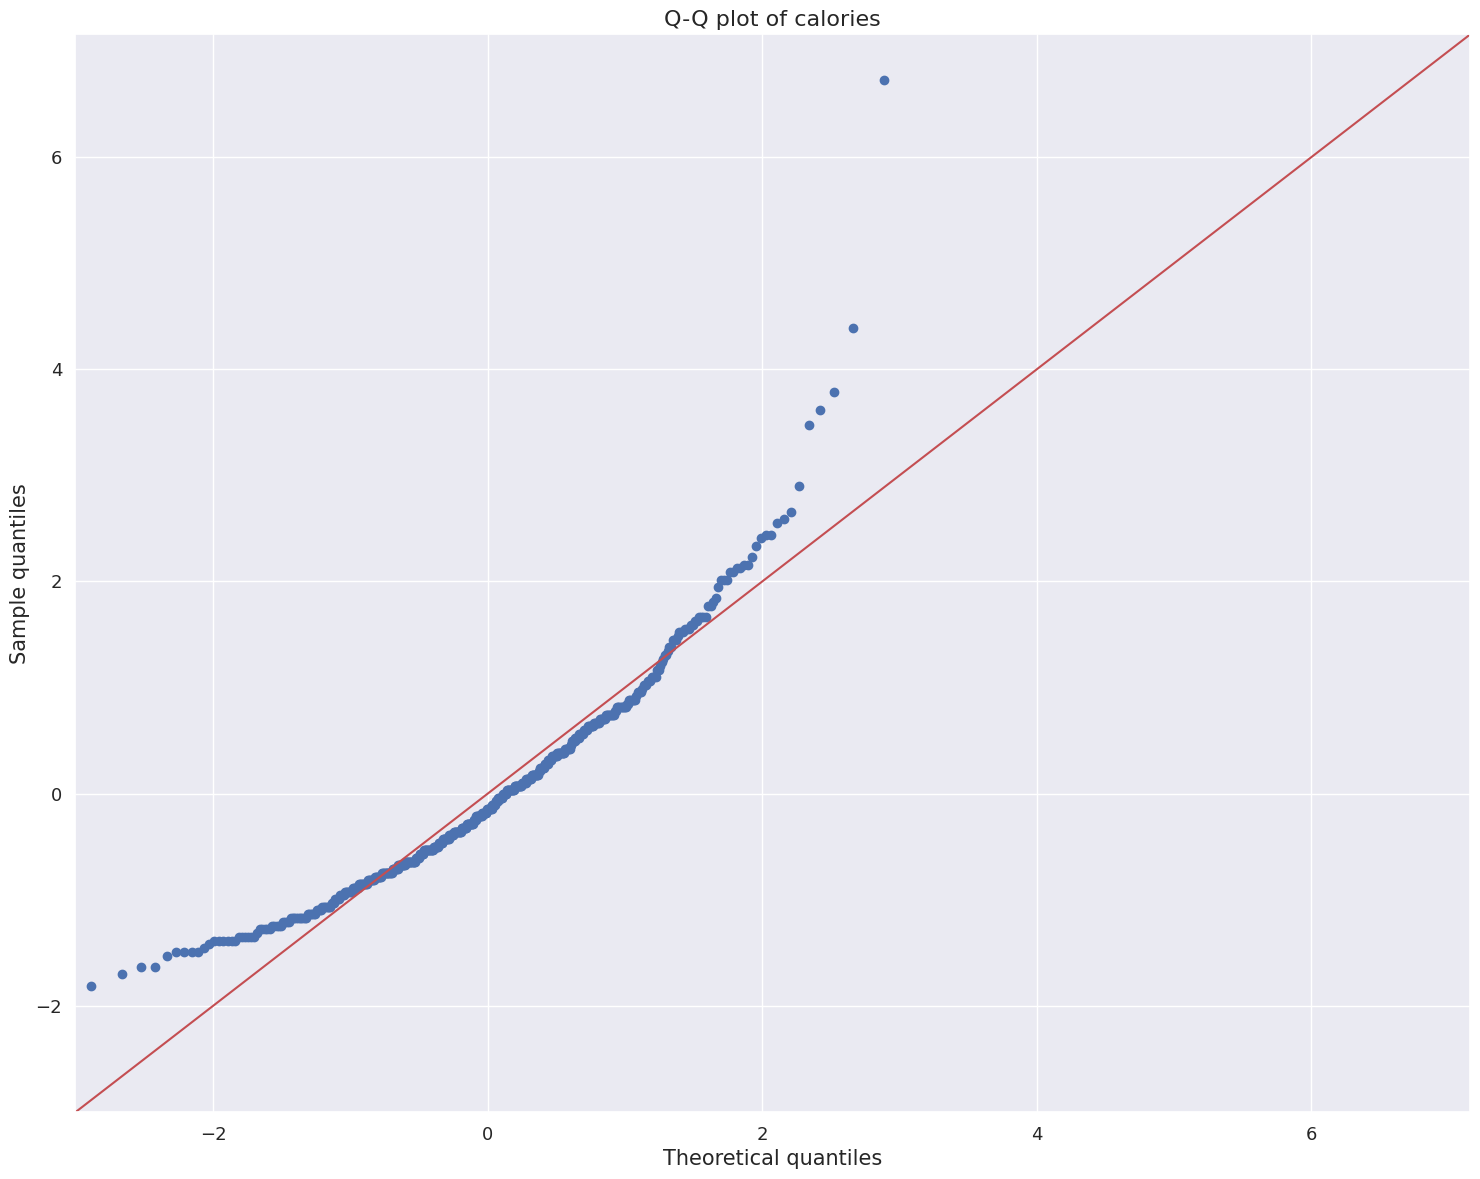

<Figure size 800x500 with 0 Axes>

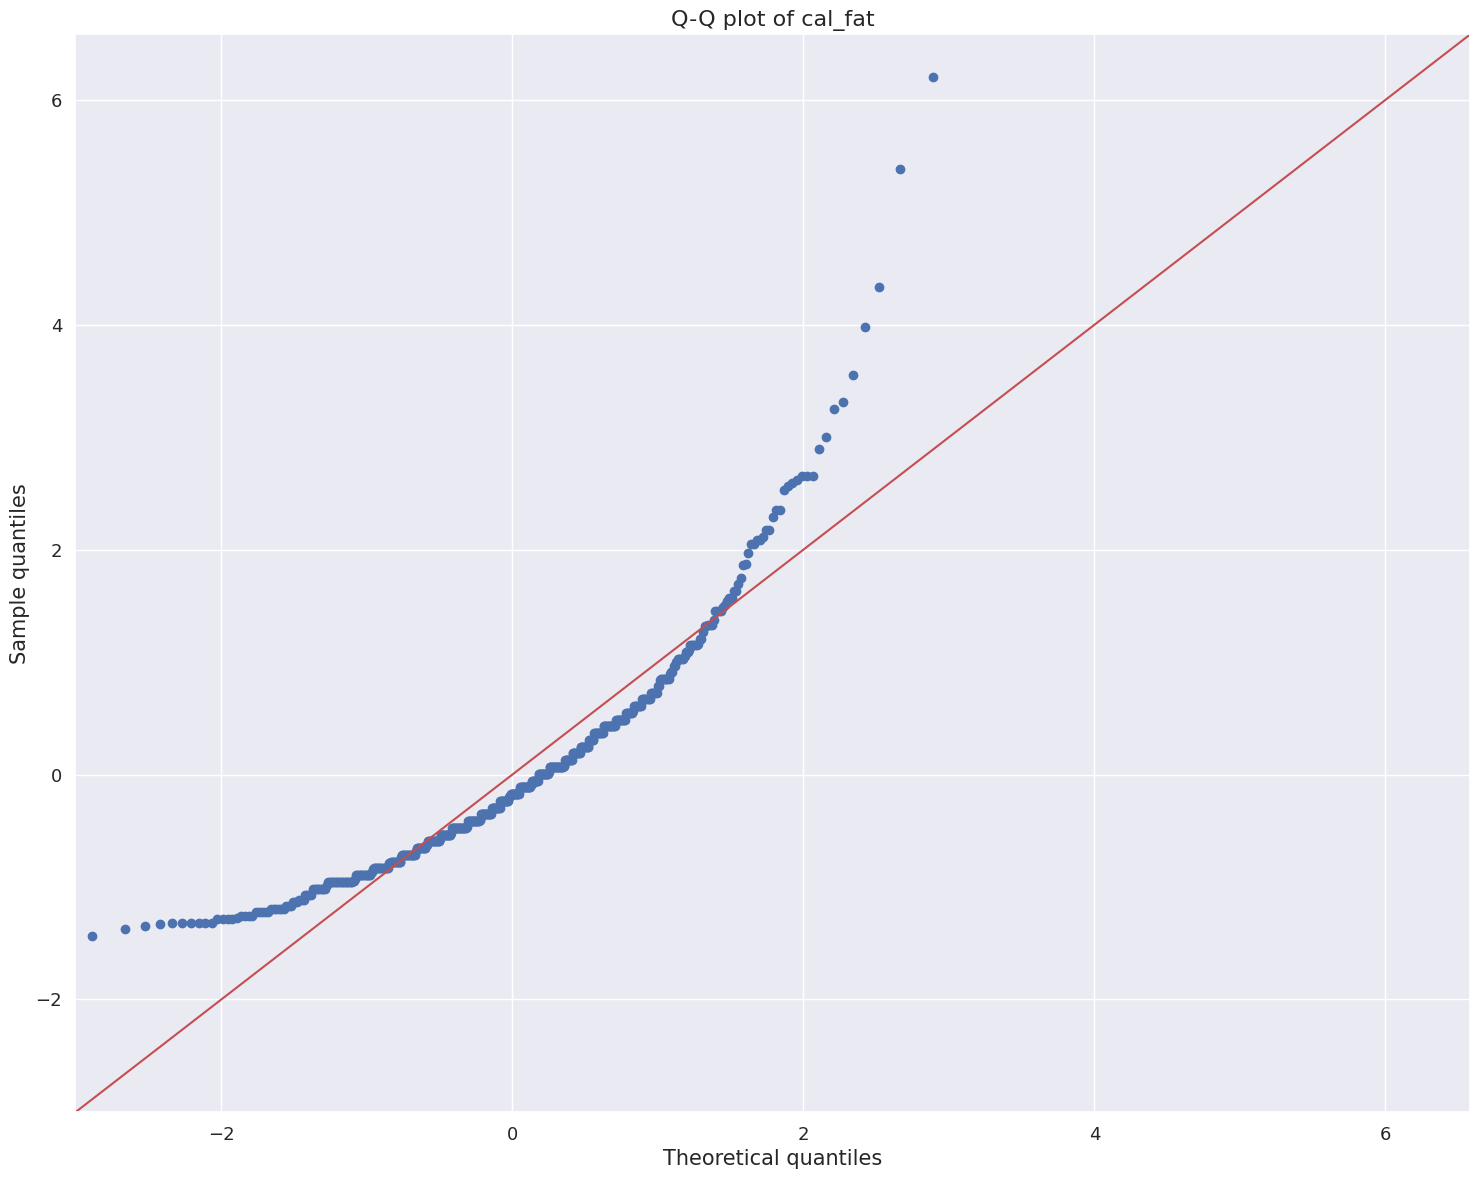

<Figure size 800x500 with 0 Axes>

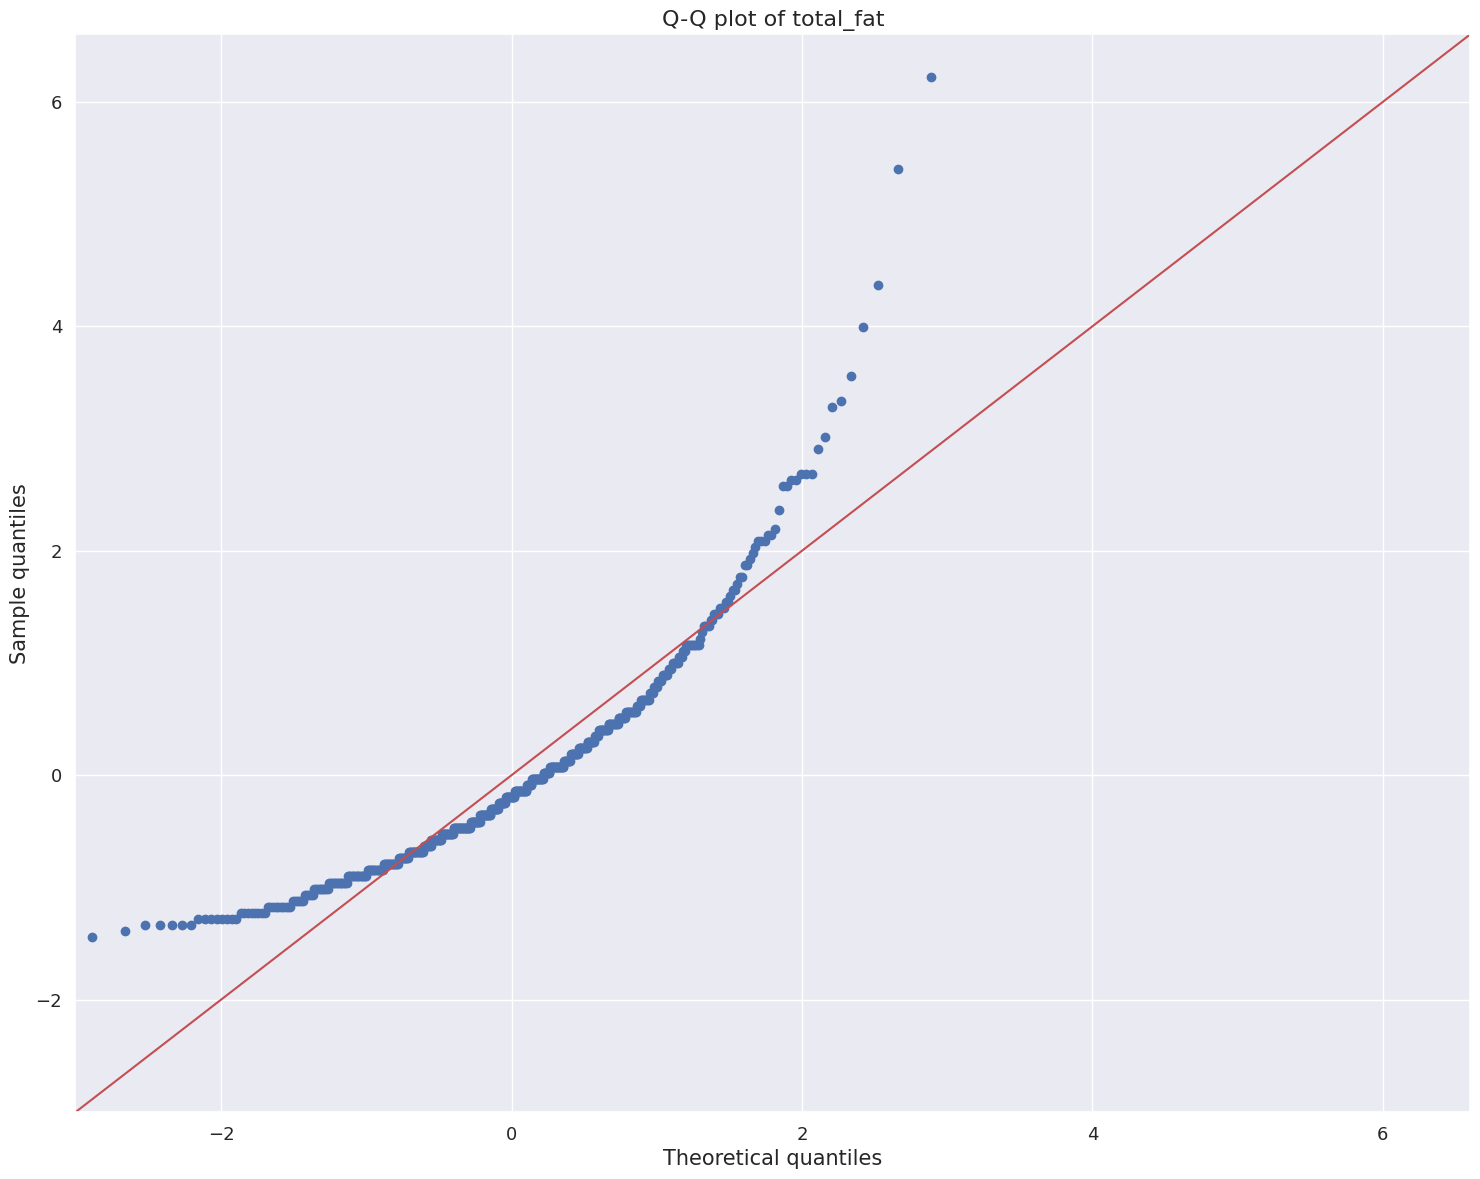

<Figure size 800x500 with 0 Axes>

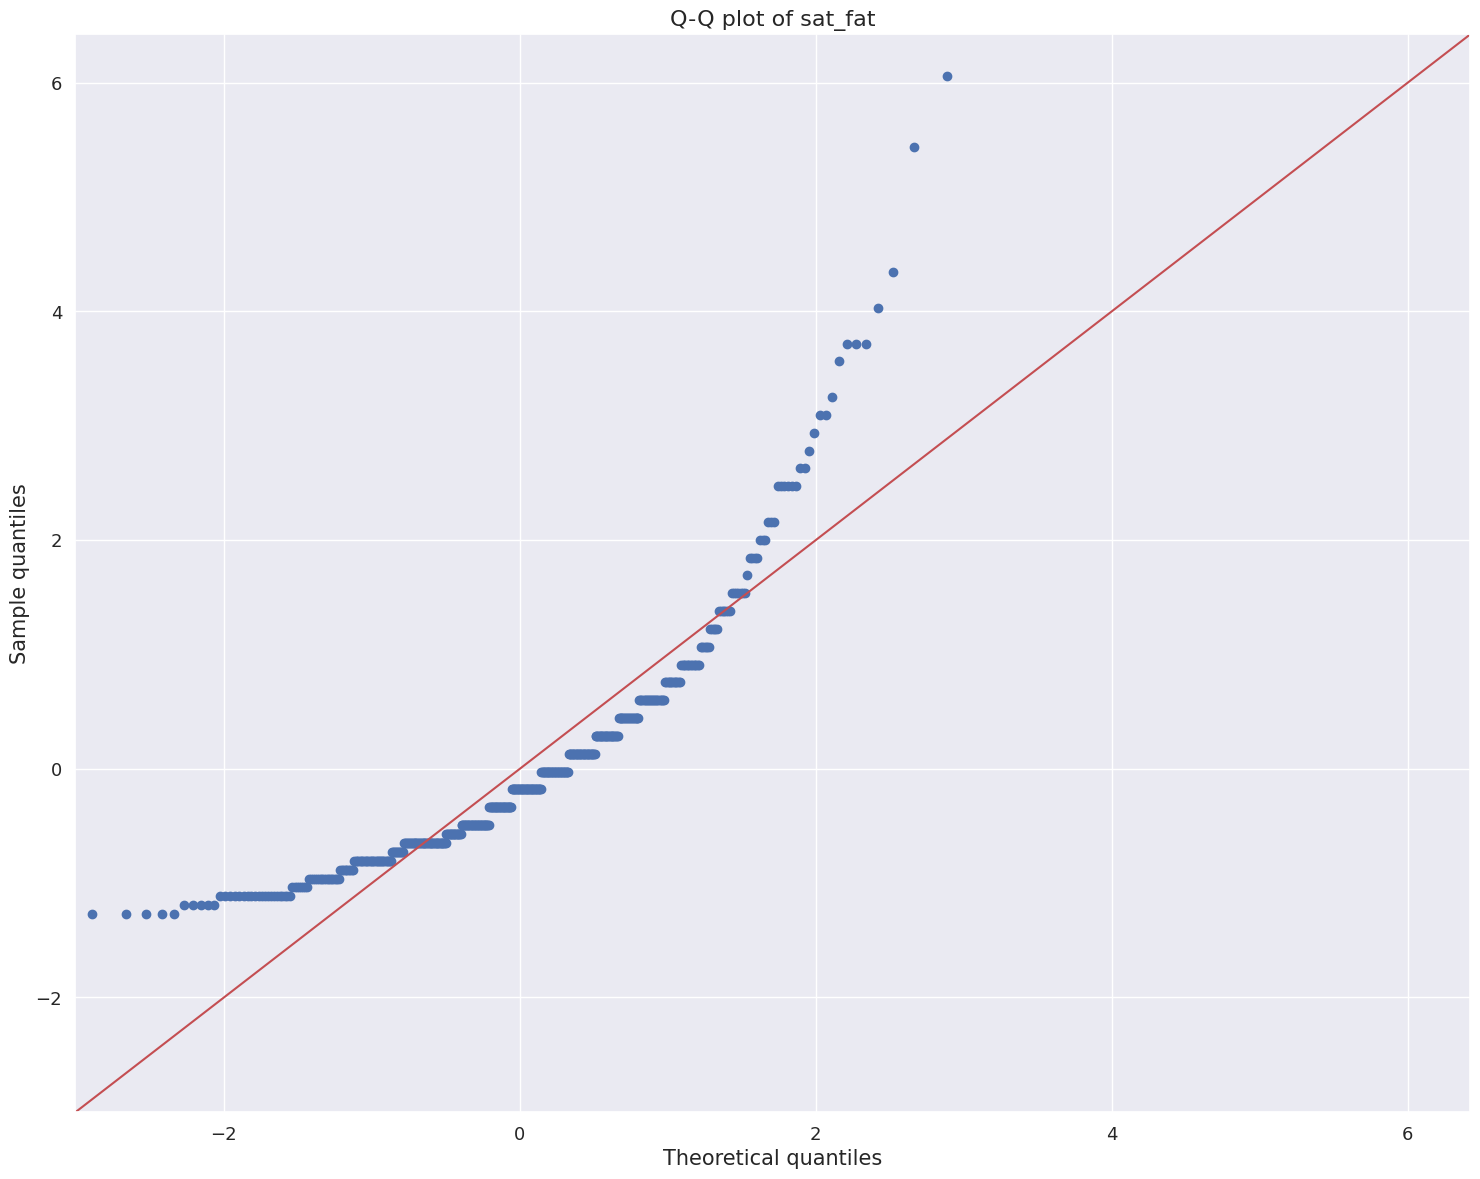

<Figure size 800x500 with 0 Axes>

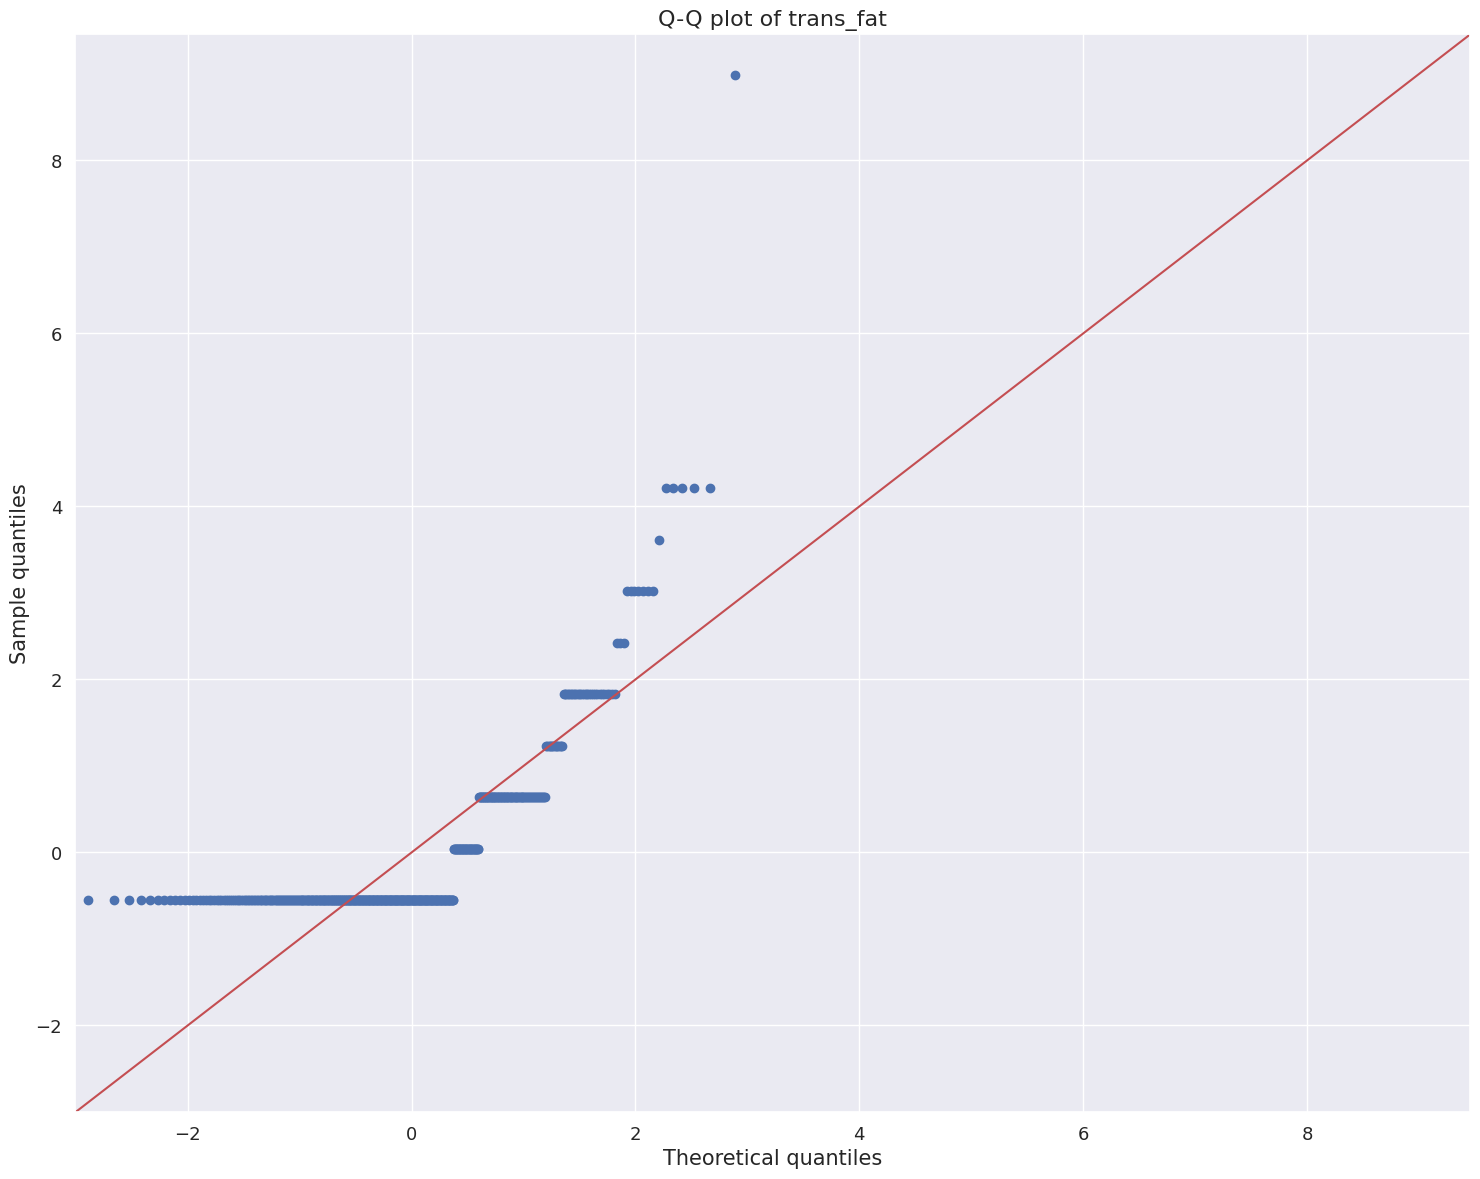

<Figure size 800x500 with 0 Axes>

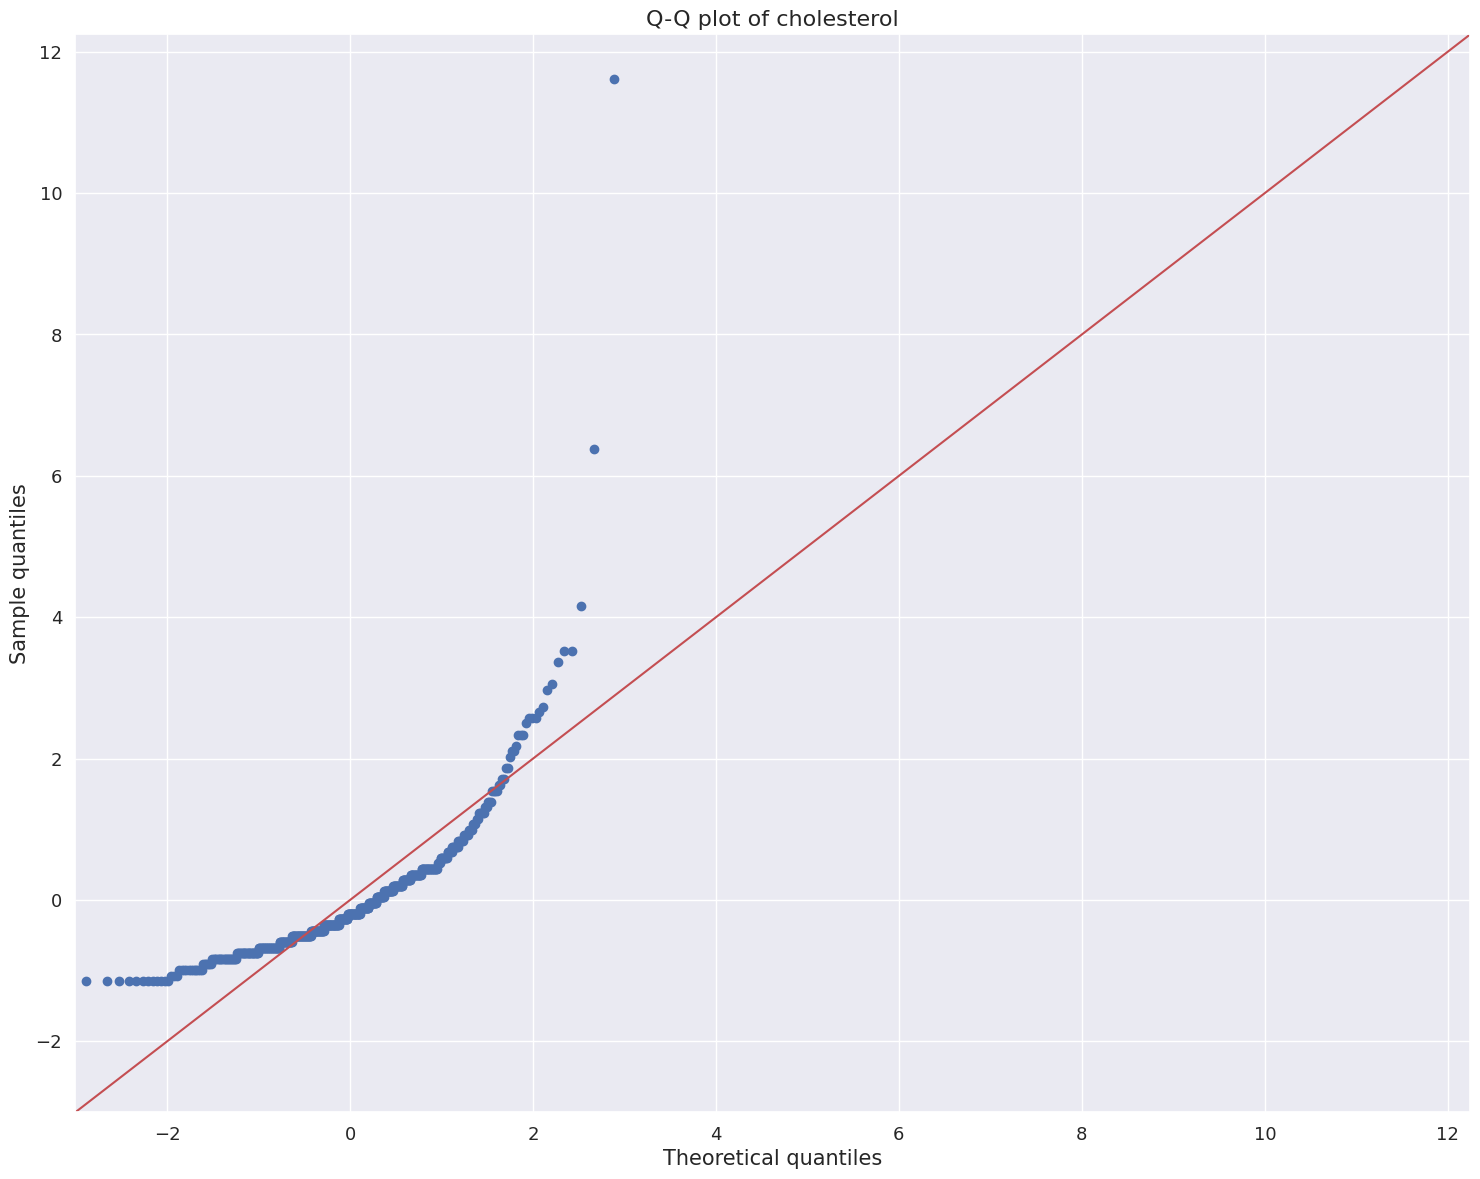

<Figure size 800x500 with 0 Axes>

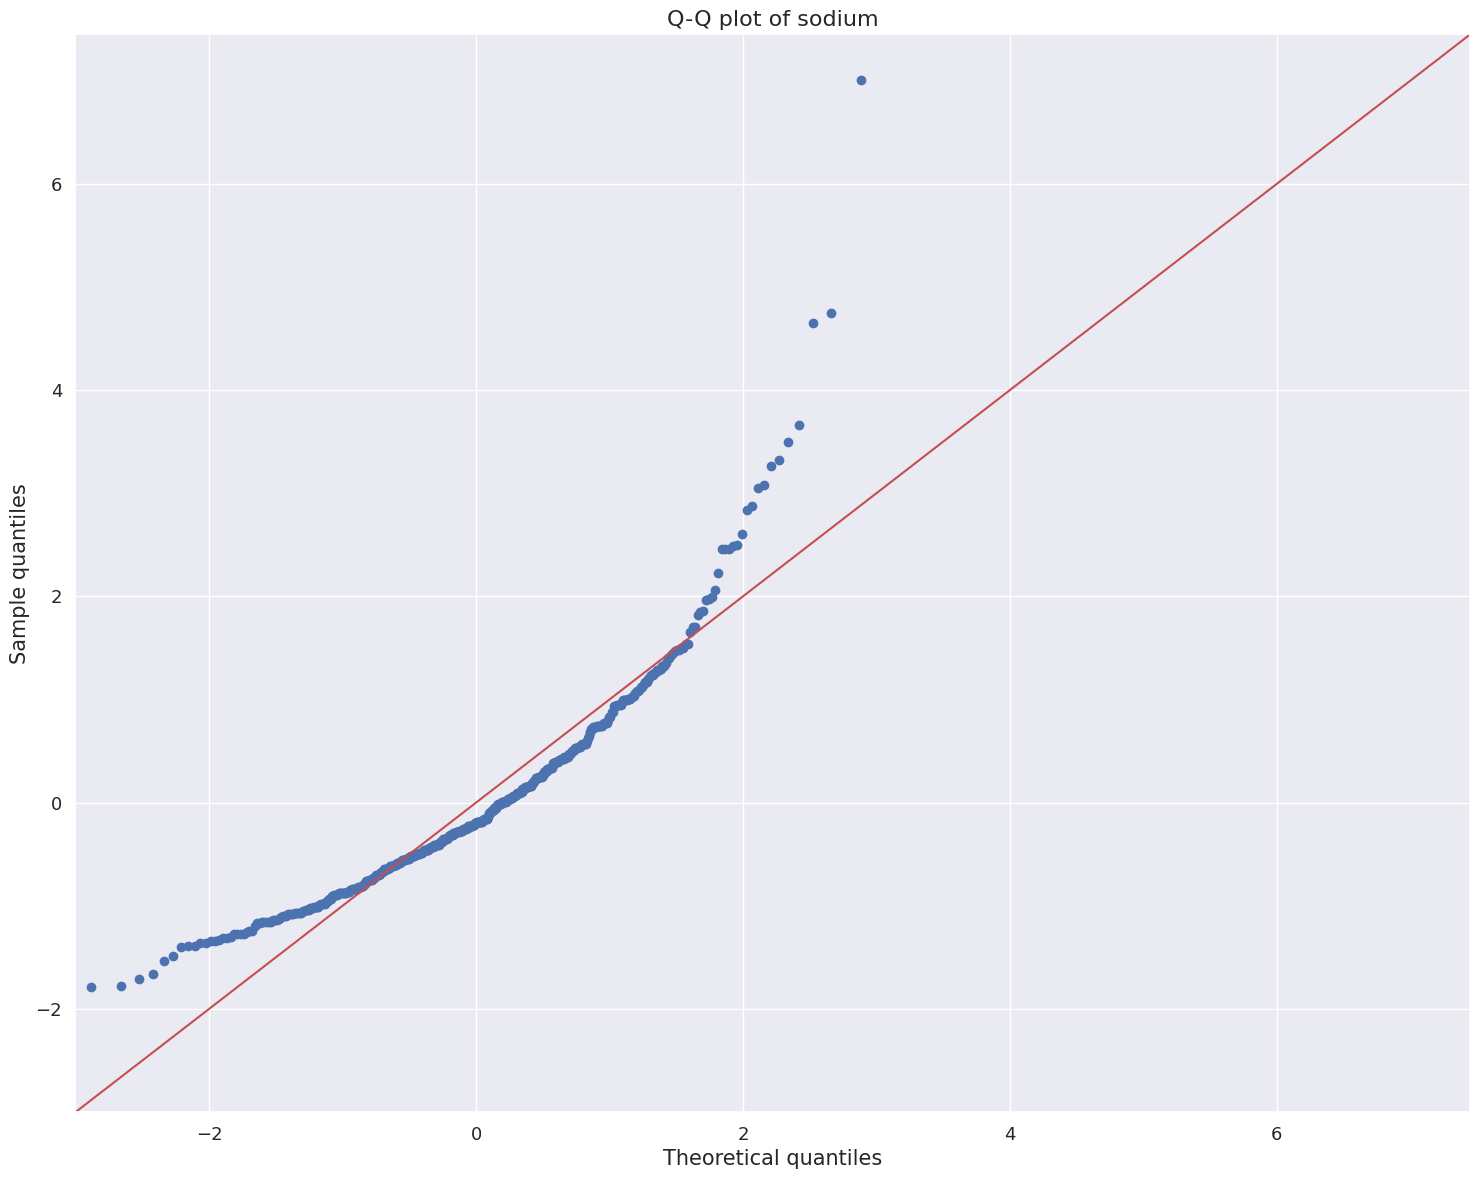

<Figure size 800x500 with 0 Axes>

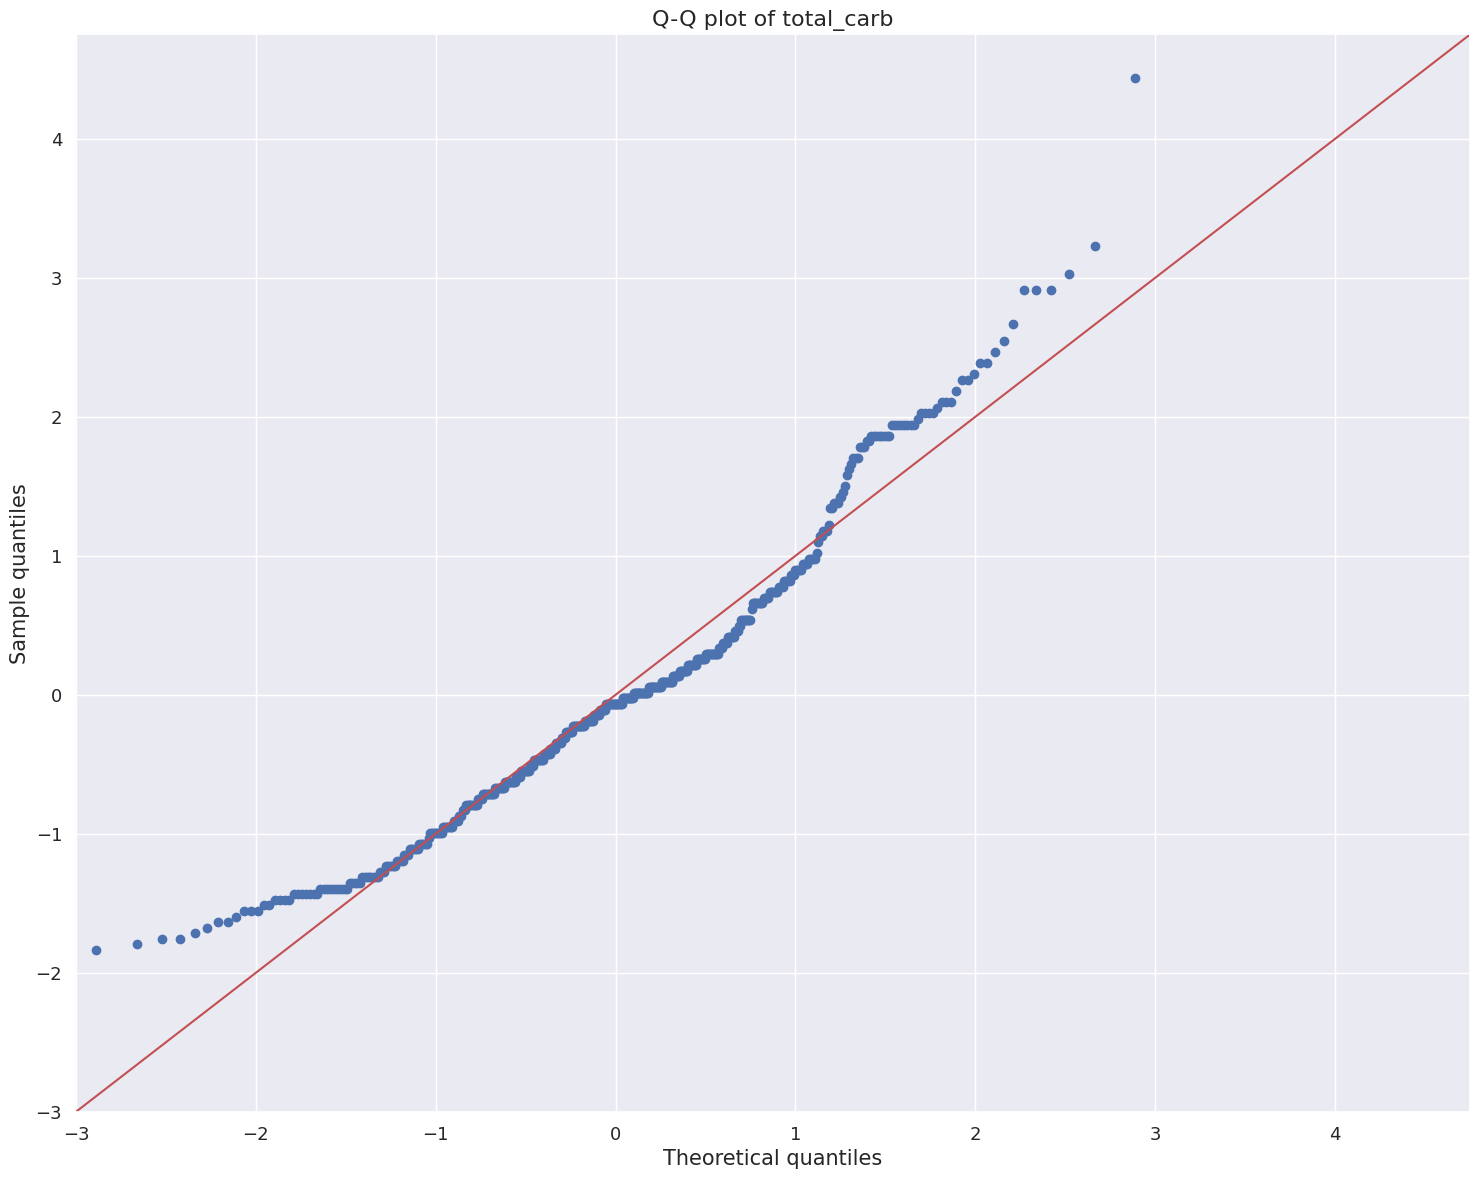

<Figure size 800x500 with 0 Axes>

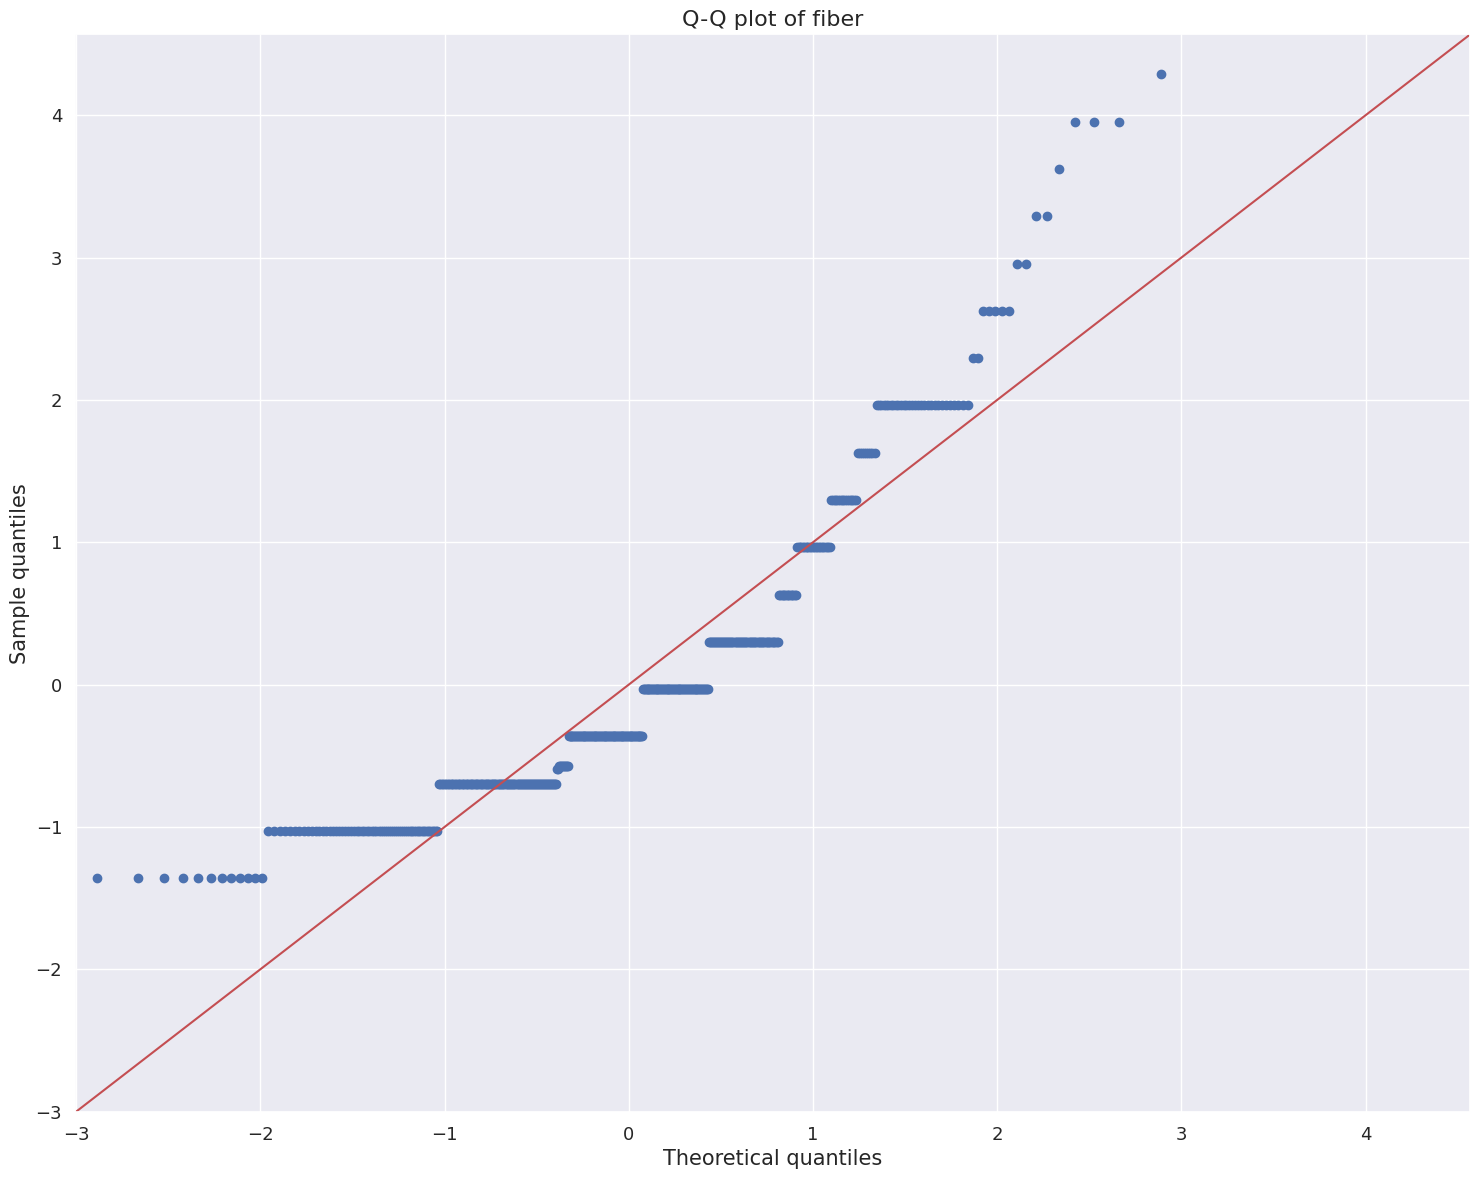

<Figure size 800x500 with 0 Axes>

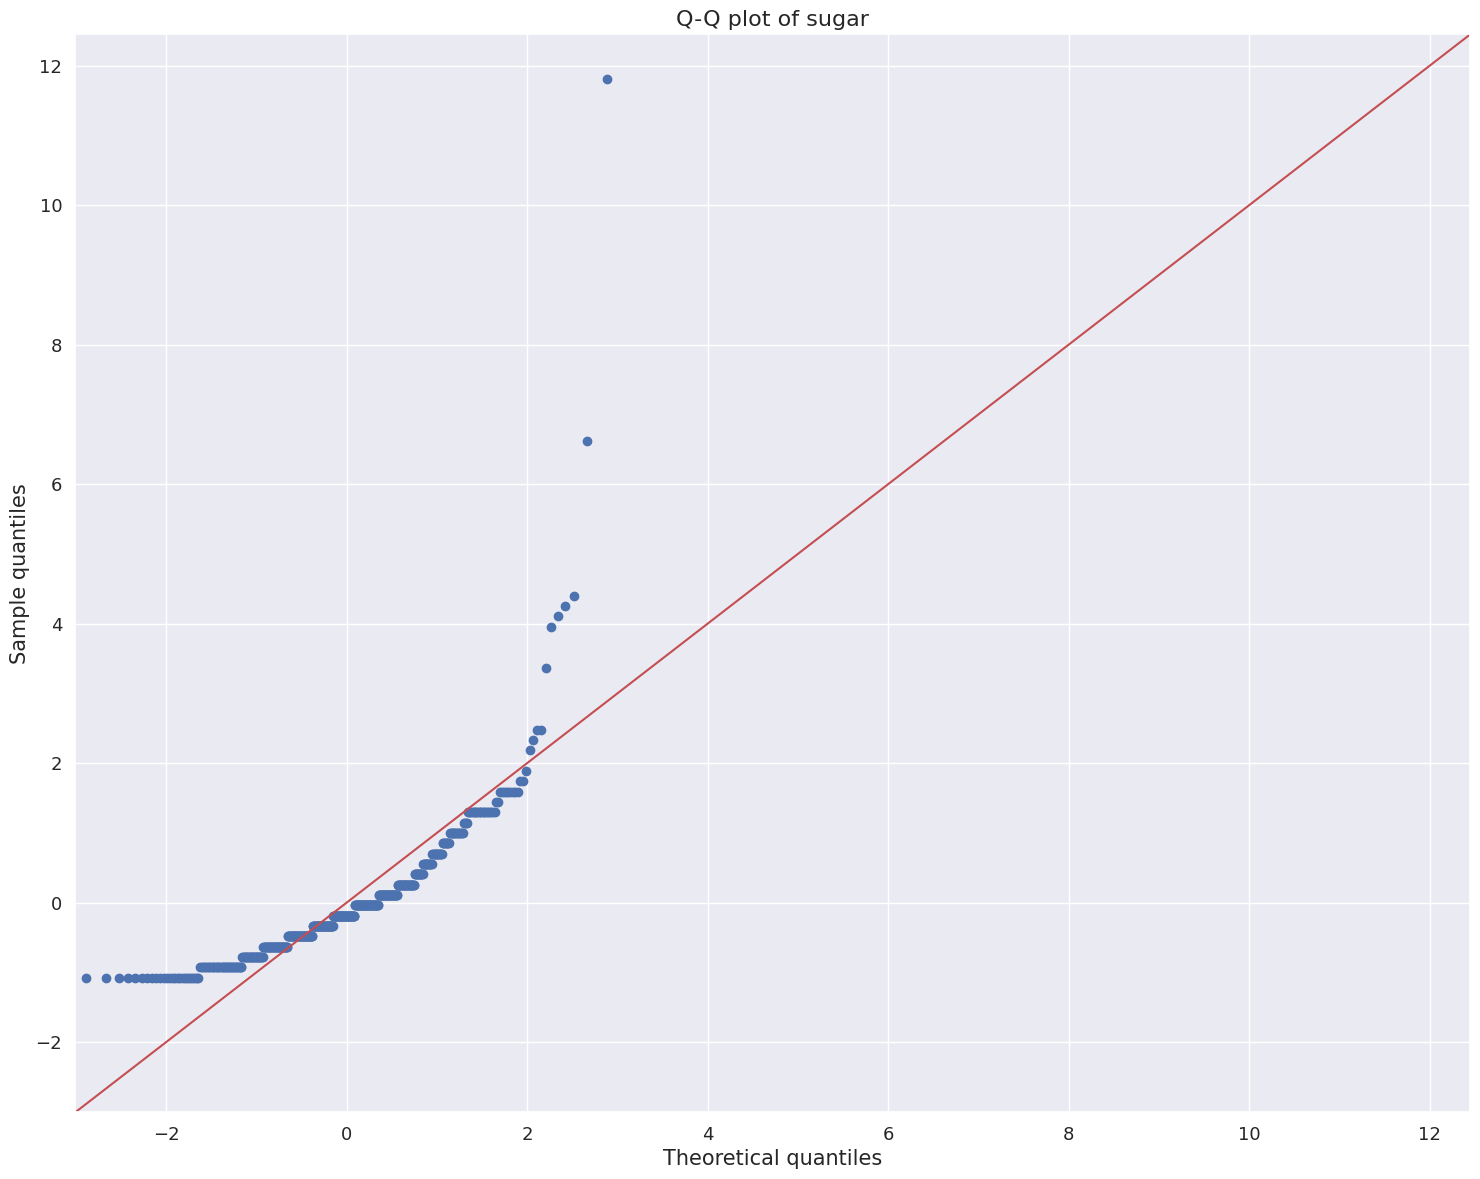

<Figure size 800x500 with 0 Axes>

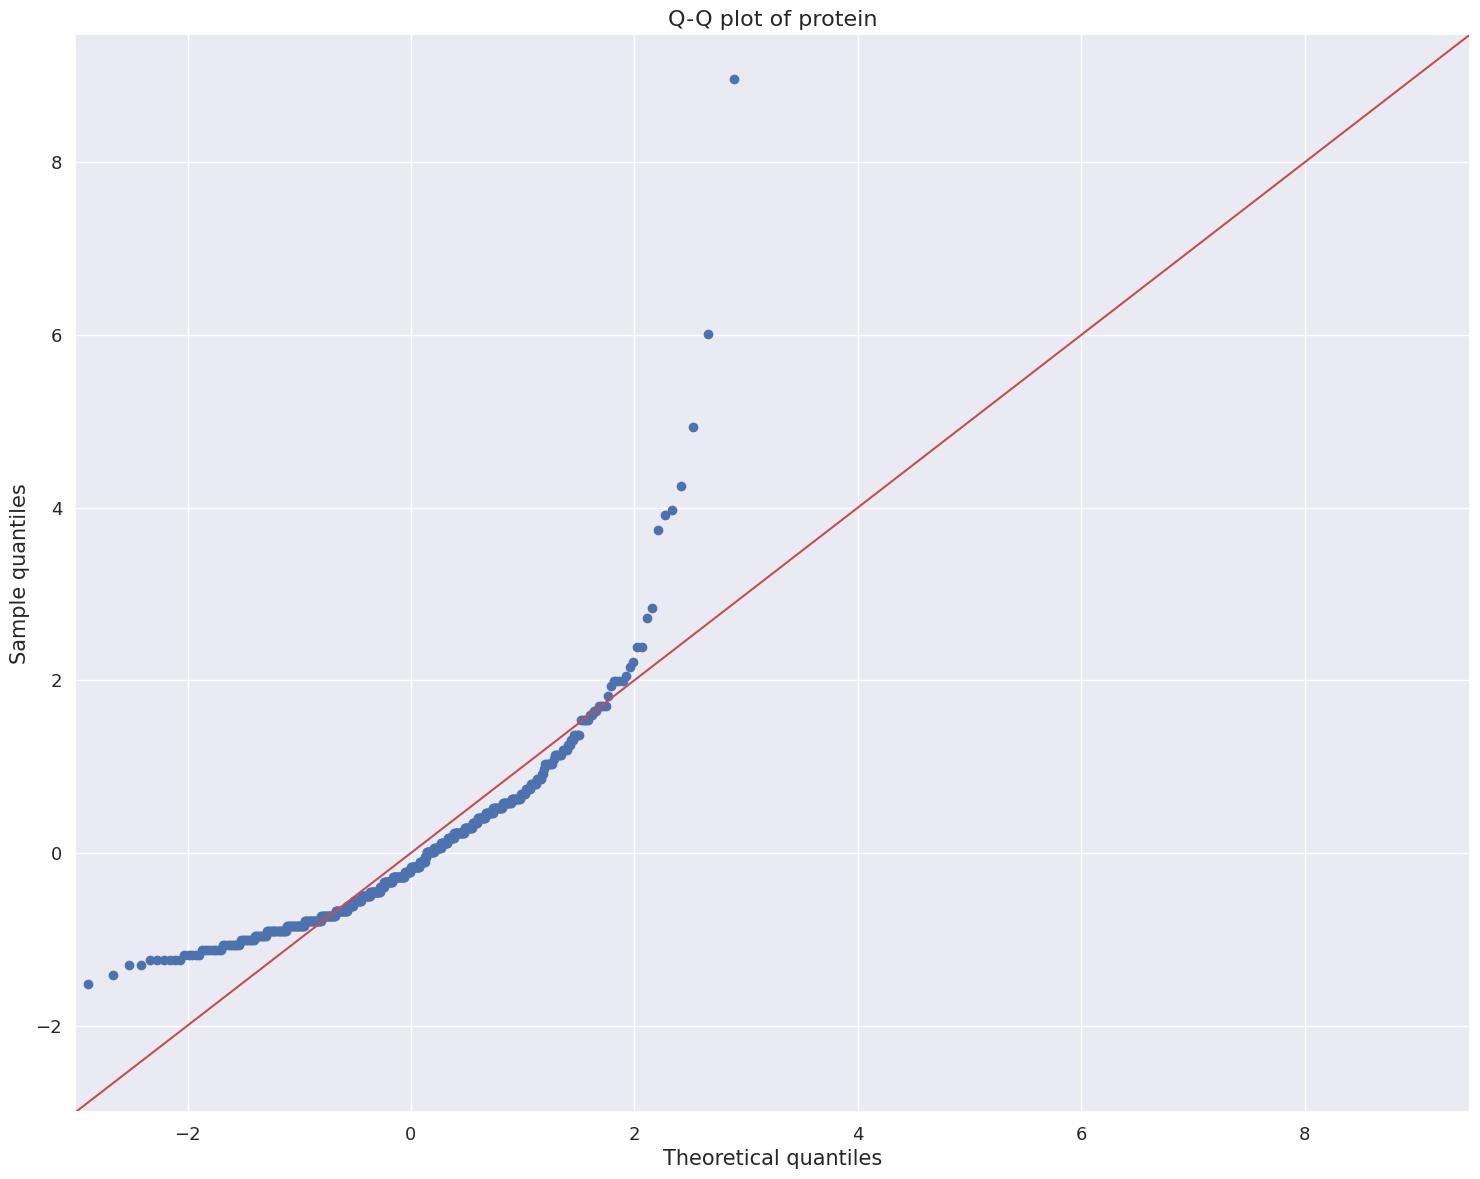

<Figure size 800x500 with 0 Axes>

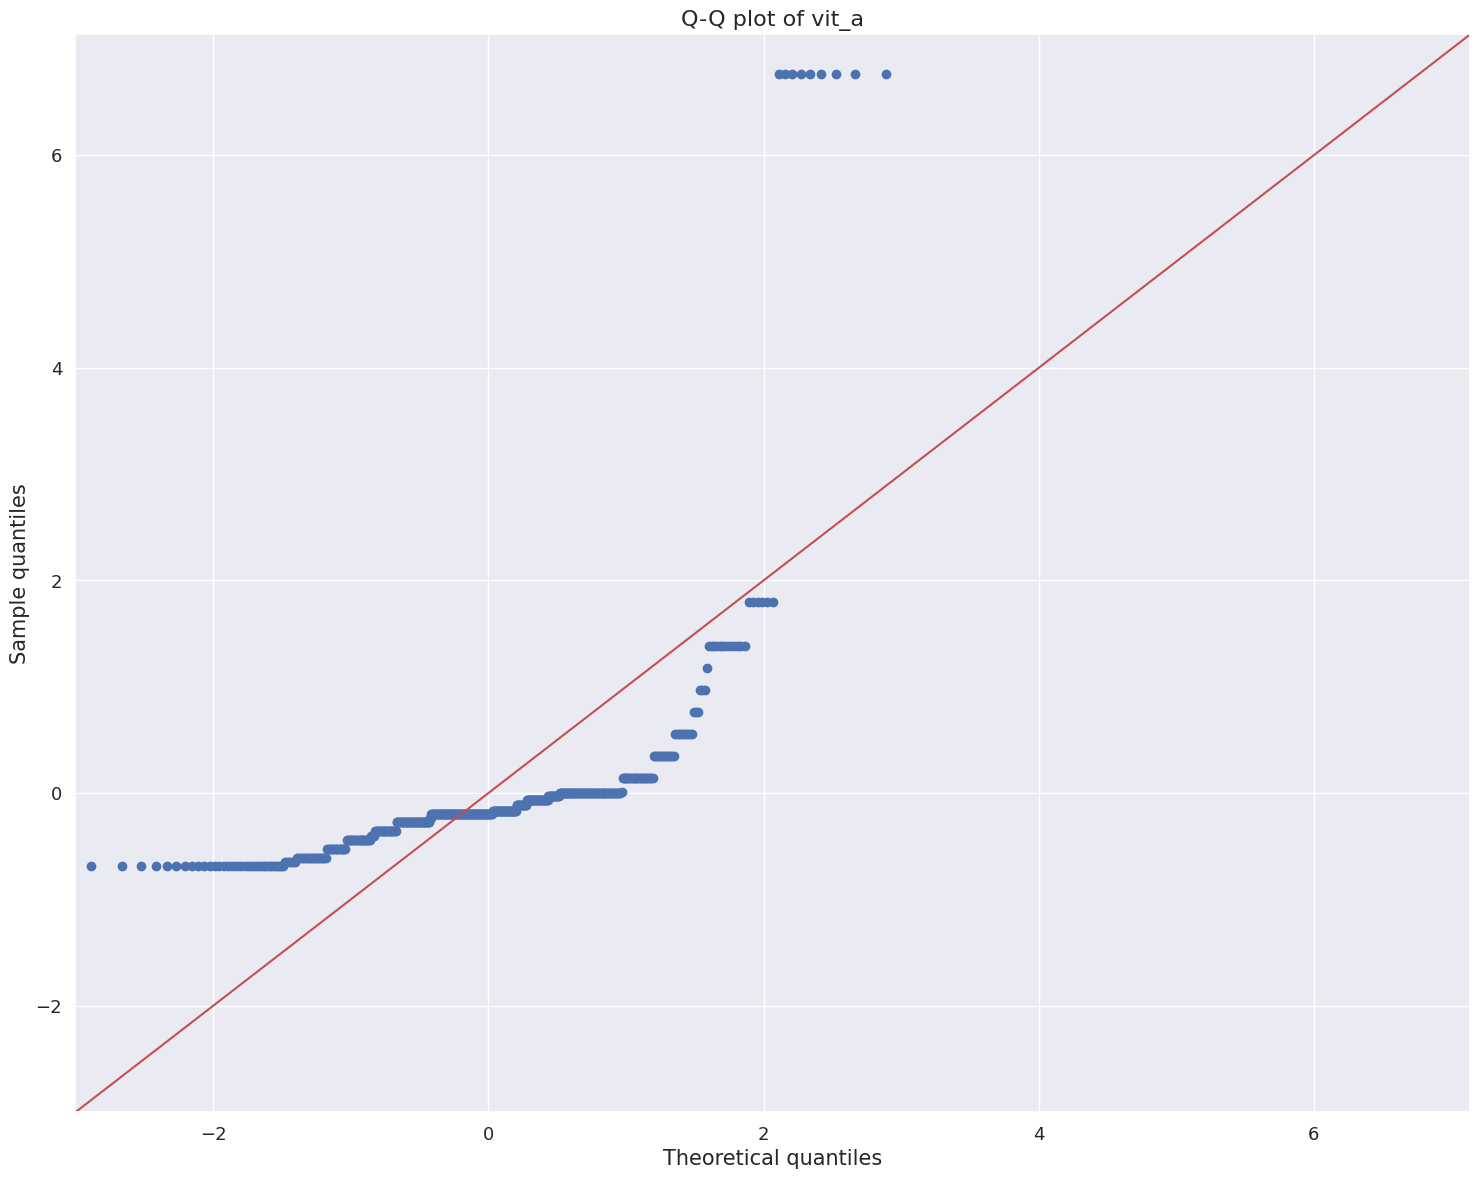

<Figure size 800x500 with 0 Axes>

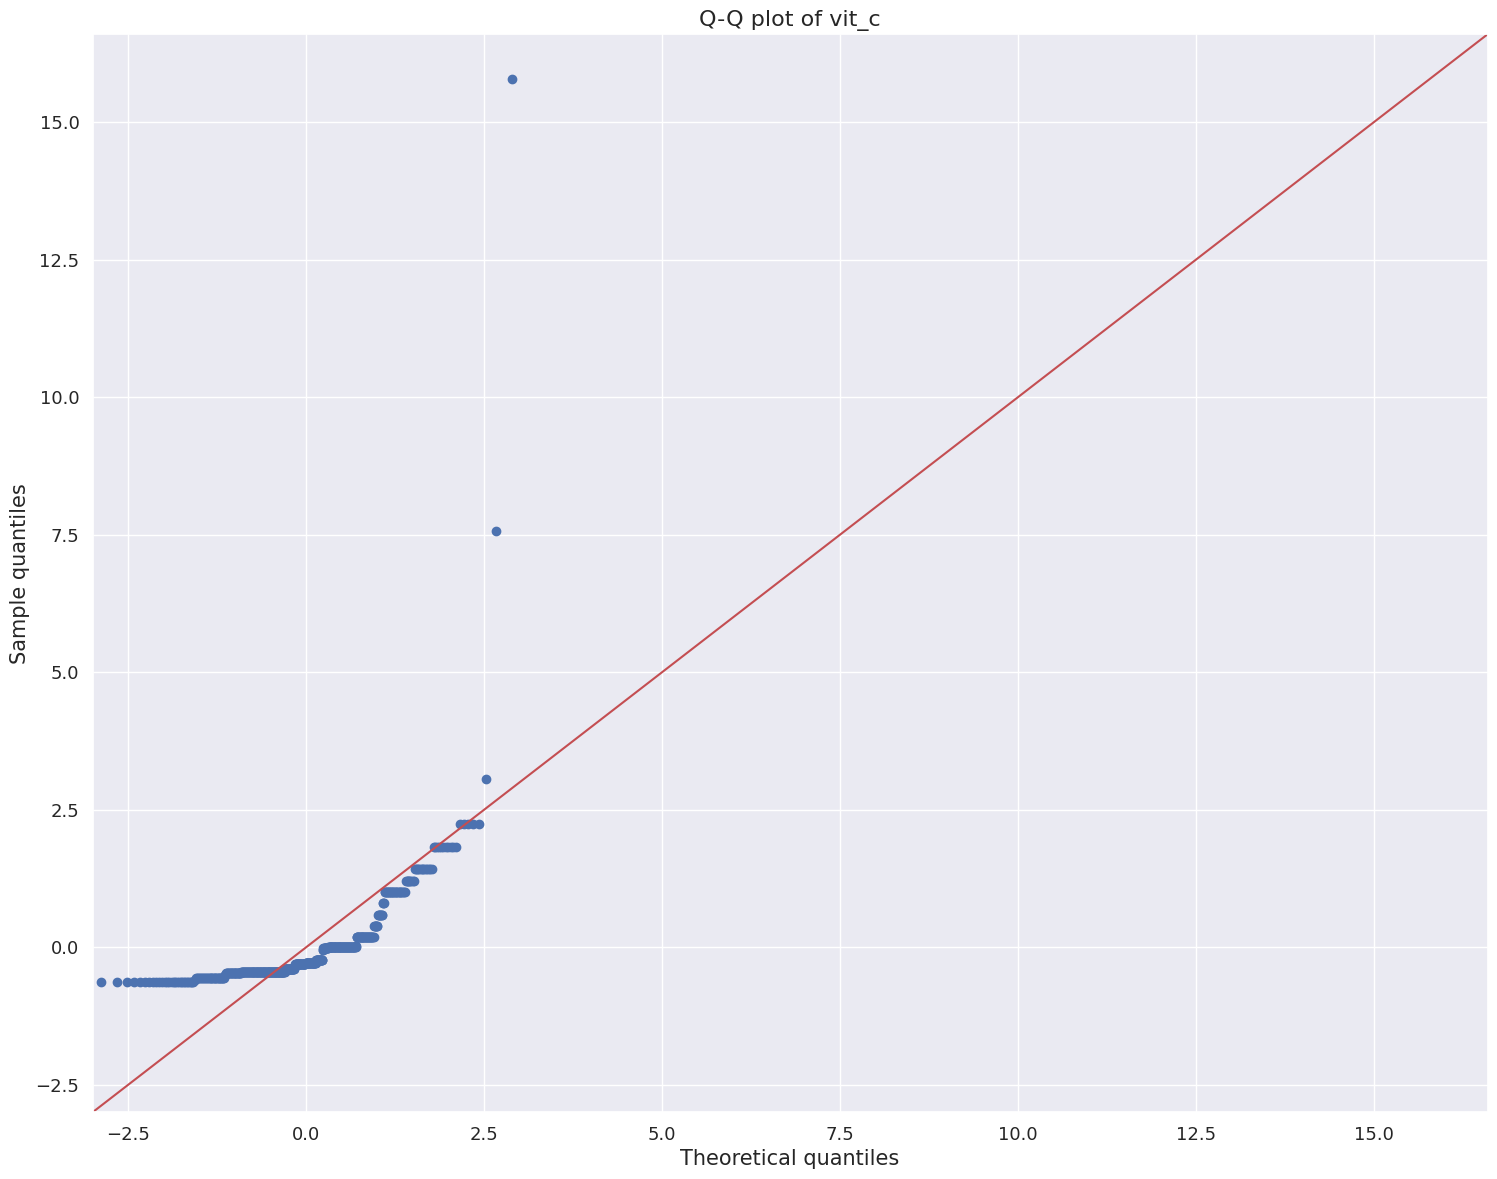

<Figure size 800x500 with 0 Axes>

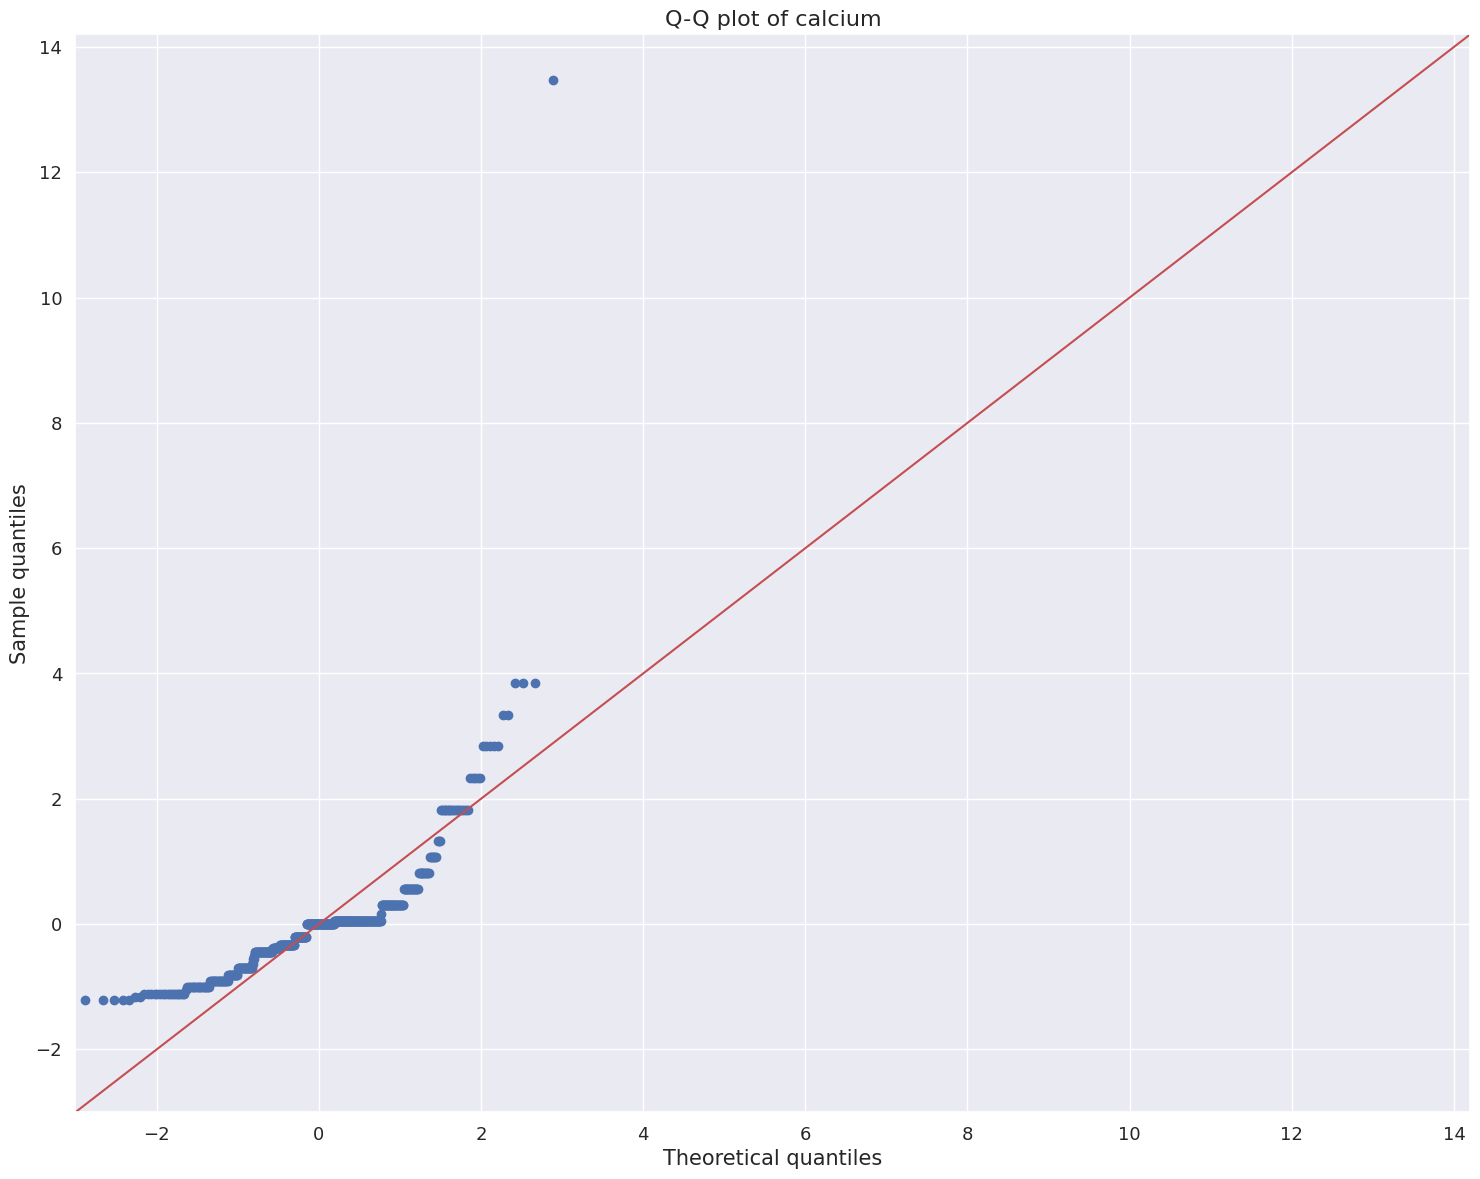

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm=data[['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

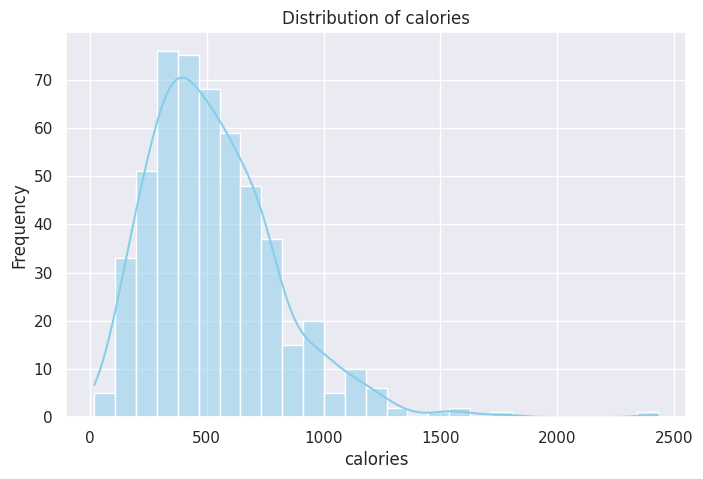

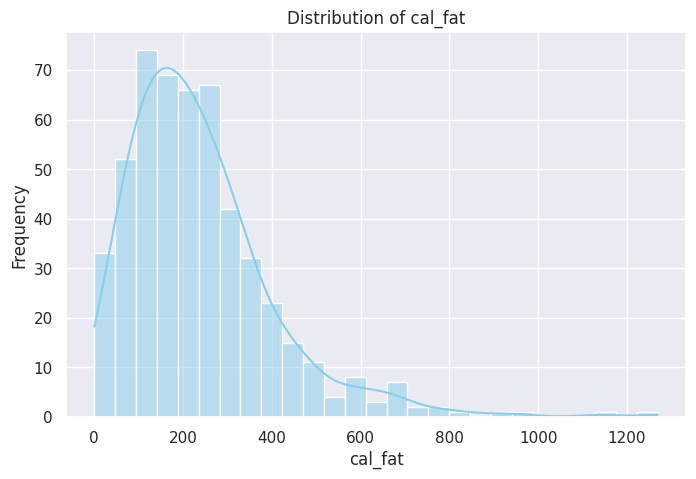

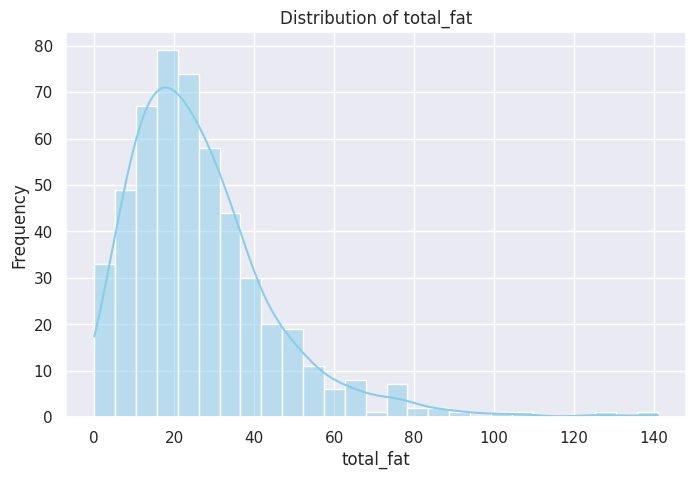

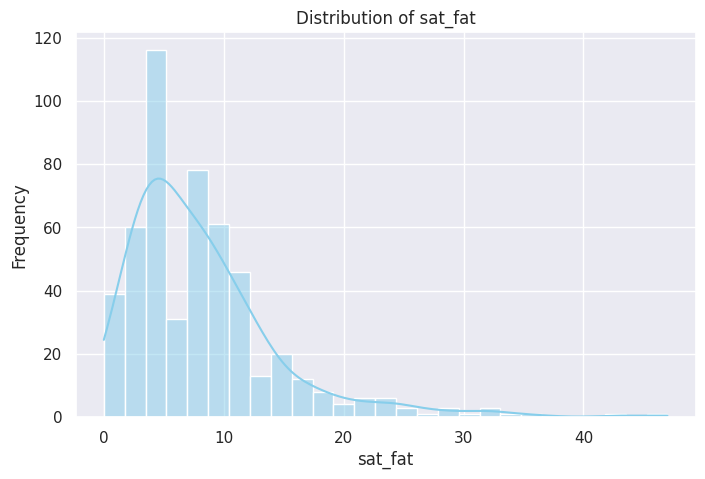

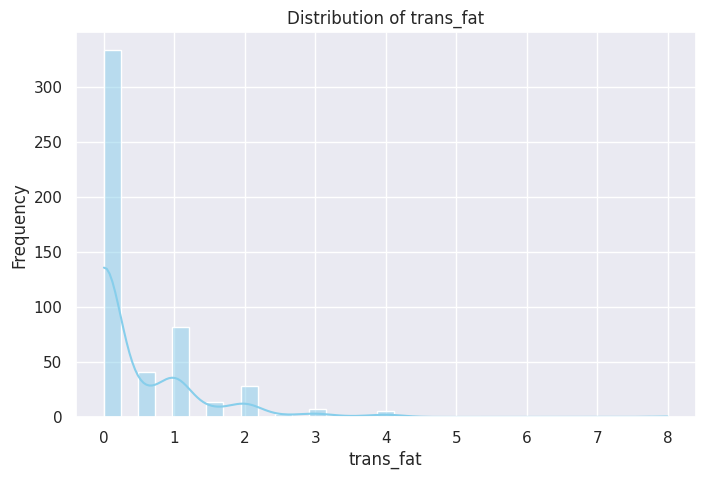

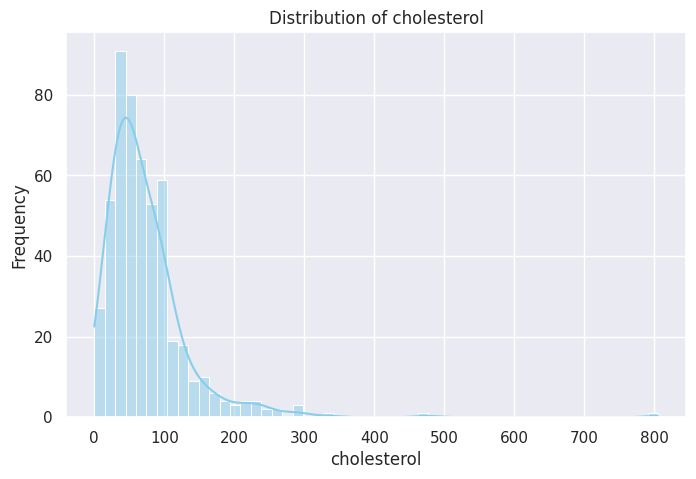

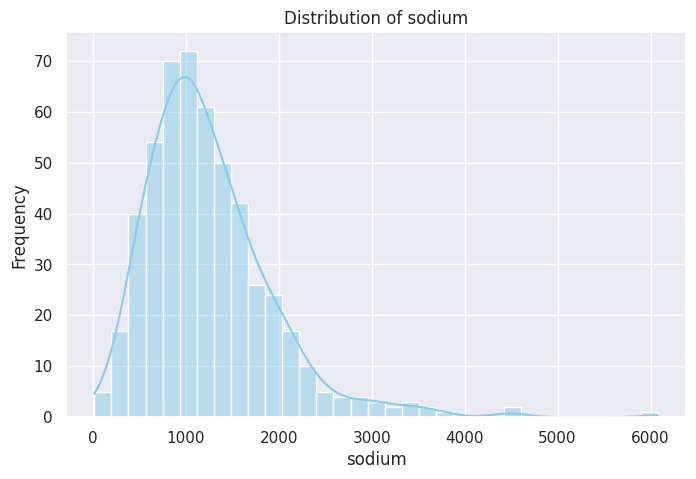

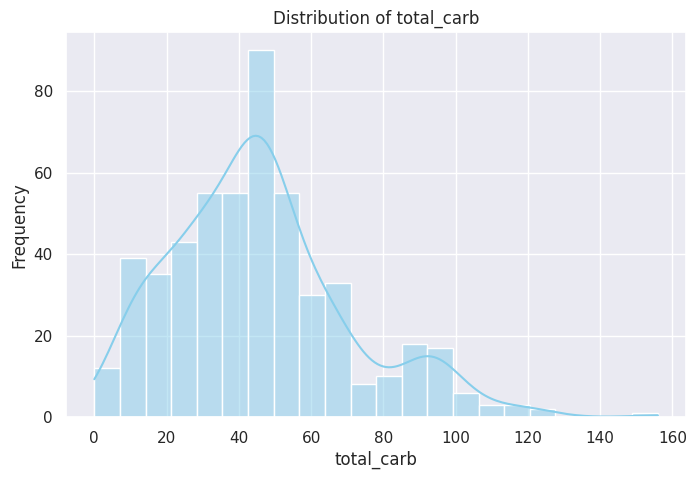

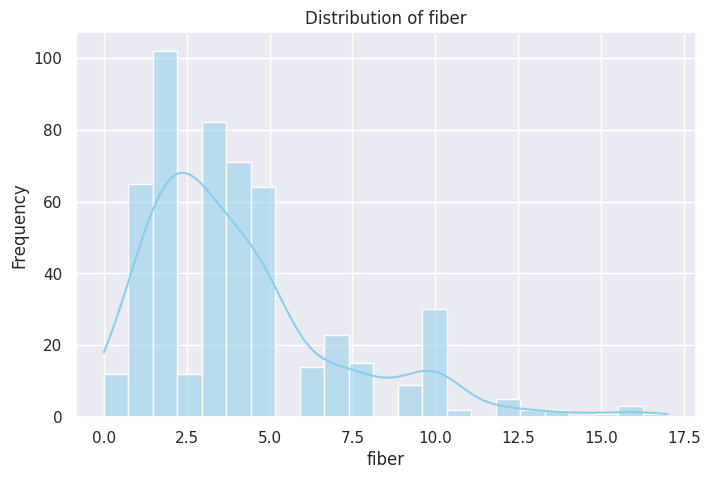

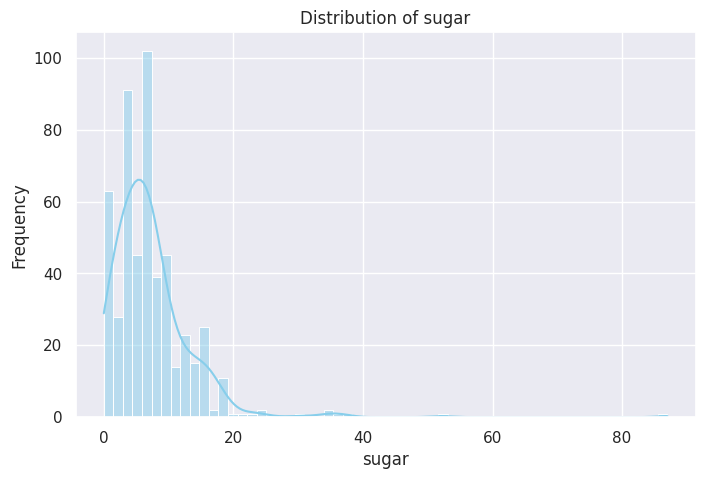

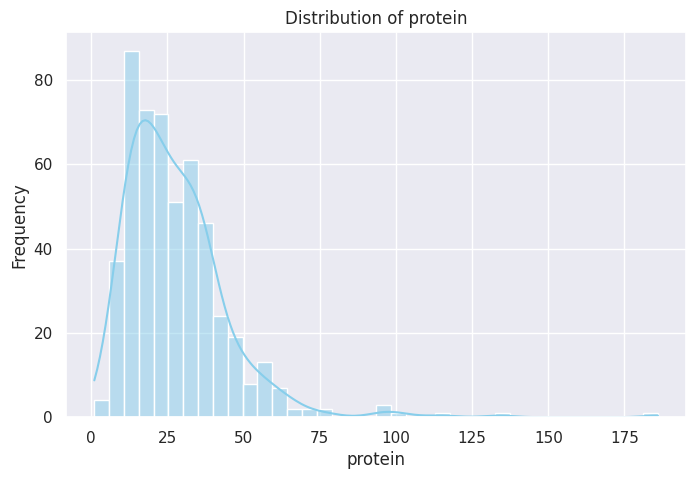

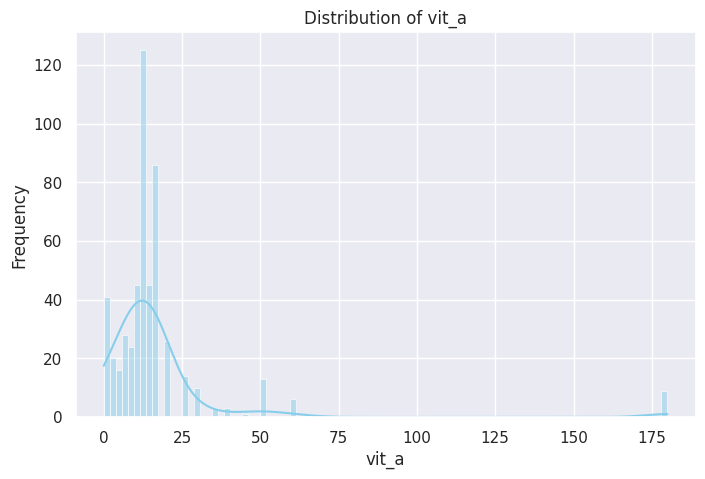

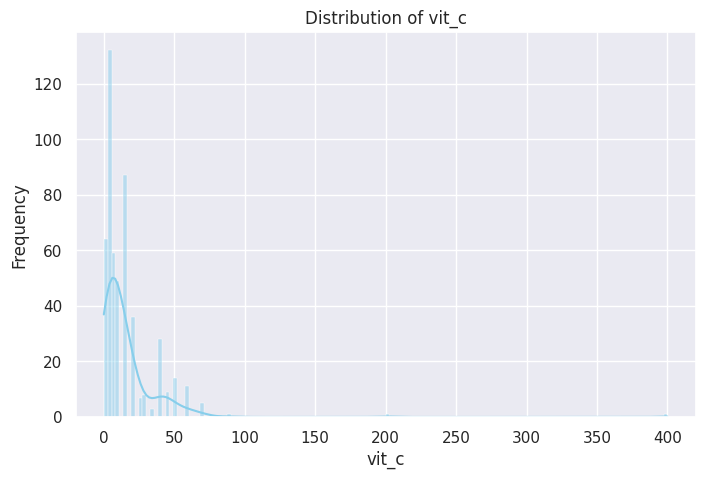

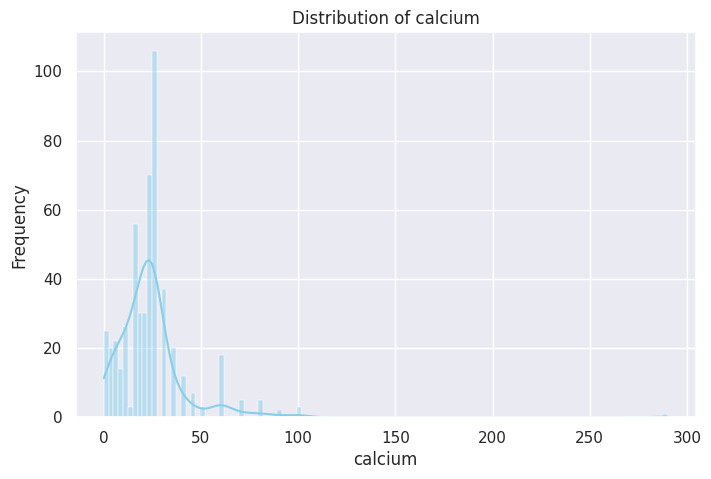

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Visualize distributions of numeric variables
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Question 9: Do the ranges of the predictor variables make sense?

In [ ]:
# Assuming 'data' is your DataFrame, replace it with your actual dataset
# Assuming 'numeric_columns' is a list of numeric column names

# Check the ranges of predictor values
for column in numeric_columns:
    min_value = data[column].min()
    max_value = data[column].max()

    print(f"Column: {column}")
    print(f"Minimum Value: {min_value}")
    print(f"Maximum Value: {max_value}")

    # Add logic to check if the range makes sense for your specific problem
    # For example, you may check if the range is within expected bounds

    print()  # Separating output for clarity


Column: calories
Minimum Value: 20
Maximum Value: 2430

Column: cal_fat
Minimum Value: 0
Maximum Value: 1270

Column: total_fat
Minimum Value: 0
Maximum Value: 141

Column: sat_fat
Minimum Value: 0.0
Maximum Value: 47.0

Column: trans_fat
Minimum Value: 0.0
Maximum Value: 8.0

Column: cholesterol
Minimum Value: 0
Maximum Value: 805

Column: sodium
Minimum Value: 15
Maximum Value: 6080

Column: total_carb
Minimum Value: 0
Maximum Value: 156

Column: fiber
Minimum Value: 0.0
Maximum Value: 17.0

Column: sugar
Minimum Value: 0
Maximum Value: 87

Column: protein
Minimum Value: 1.0
Maximum Value: 186.0

Column: vit_a
Minimum Value: 0.0
Maximum Value: 180.0

Column: vit_c
Minimum Value: 0.0
Maximum Value: 400.0

Column: calcium
Minimum Value: 0.0
Maximum Value: 290.0



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame and 'numeric_columns' is a list of numeric column names
numeric_columns = ['cal_fat', 'total_fat', 'sodium', 'total_carb', 'protein']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Assign the 'calories' column back to the normalized DataFrame
data_norm = data.copy()

# Check the first few rows of the normalized DataFrame
print(data_norm.head())


  restaurant                                       item  calories   cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380  0.047244   
1  Mcdonalds             Single Bacon Smokehouse Burger       840  0.322835   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130  0.472441   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750  0.220472   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920  0.322835   

   total_fat  sat_fat  trans_fat  cholesterol    sodium  total_carb  fiber  \
0   0.049645      2.0        0.0           95  0.180544    0.282051    3.0   
1   0.319149     17.0        1.5          130  0.258038    0.397436    2.0   
2   0.475177     27.0        3.0          220  0.314097    0.403846    3.0   
3   0.219858     10.0        0.5          155  0.317395    0.397436    2.0   
4   0.319149     12.0        0.5          120  0.323990    0.519231    4.0   

   sugar   protein  vit_a  vit_c  calcium  salad  
0    

In [ ]:
#As the ranges were diferent. Below is the output after normalizing the dataset.
data_norm.describe()

calories     cal_fat   total_fat     sat_fat   trans_fat  \
count   515.000000  515.000000  515.000000  515.000000  515.000000   
mean    530.912621    0.188042    0.188584    8.153398    0.465049   
std     282.436147    0.131030    0.130581    6.418811    0.839644   
min      20.000000    0.000000    0.000000    0.000000    0.000000   
25%     330.000000    0.094488    0.099291    4.000000    0.000000   
50%     490.000000    0.165354    0.163121    7.000000    0.000000   
75%     690.000000    0.244094    0.248227   11.000000    1.000000   
max    2430.000000    1.000000    1.000000   47.000000    8.000000   

       cholesterol      sodium  total_carb       fiber       sugar  \
count   515.000000  515.000000  515.000000  515.000000  515.000000   
mean     72.456311    0.203090    0.292718    4.096000    7.262136   
std      63.160406    0.113760    0.159509    3.013634    6.761301   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%      35.000000    0.129431    0.182692    2.000000    3.000000   
50%      60.000000    0.180544    0.282051    3.000000    6.000000   
75%      95.000000    0.253092    0.365385    5.000000    9.000000   
max     805.000000    1.000000    1.000000   17.000000   87.000000   

          protein       vit_a       vit_c     calcium  
count  515.000000  515.000000  515.000000  515.000000  
mean     0.145379   16.676247   15.561371   23.925034  
std      0.095497   24.162678   24.383661   19.774362  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.081081    9.000000    4.540000   15.000000  
50%      0.129730   11.850000    8.400000   23.925034  
75%      0.189189   16.676247   15.561371   25.000000  
max      1.000000  180.000000  400.000000  290.000000

# Question 4: Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)



1. **Correlation Matrix**

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


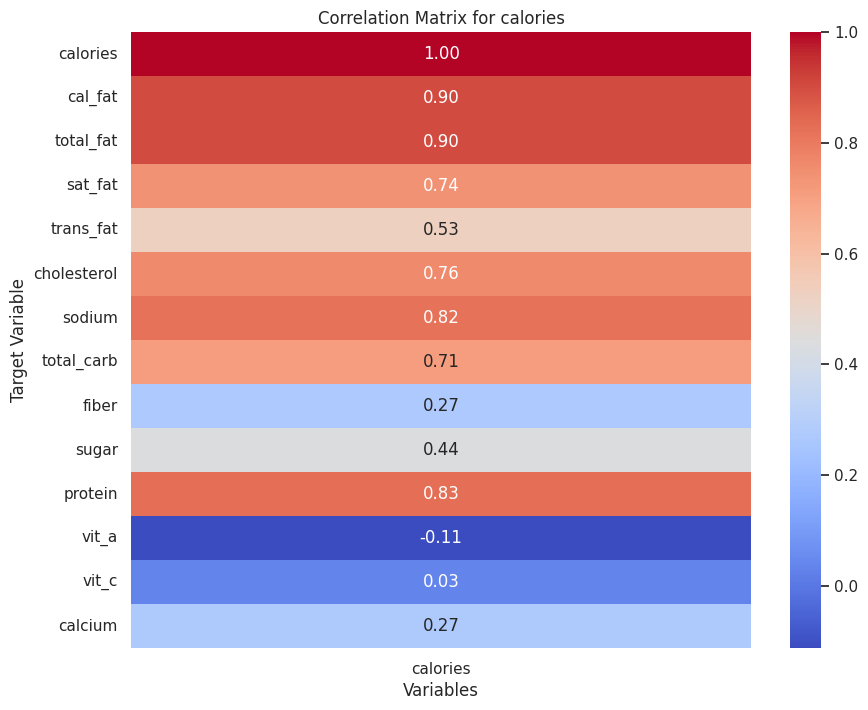

In [ ]:
target_variable = "calories"

# Calculate correlation matrix
correlation_matrix = data.corr()

# Filter correlation matrix for the target variable
target_correlation = correlation_matrix[target_variable]

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for {target_variable}")
plt.xlabel("Variables")
plt.ylabel("Target Variable")
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

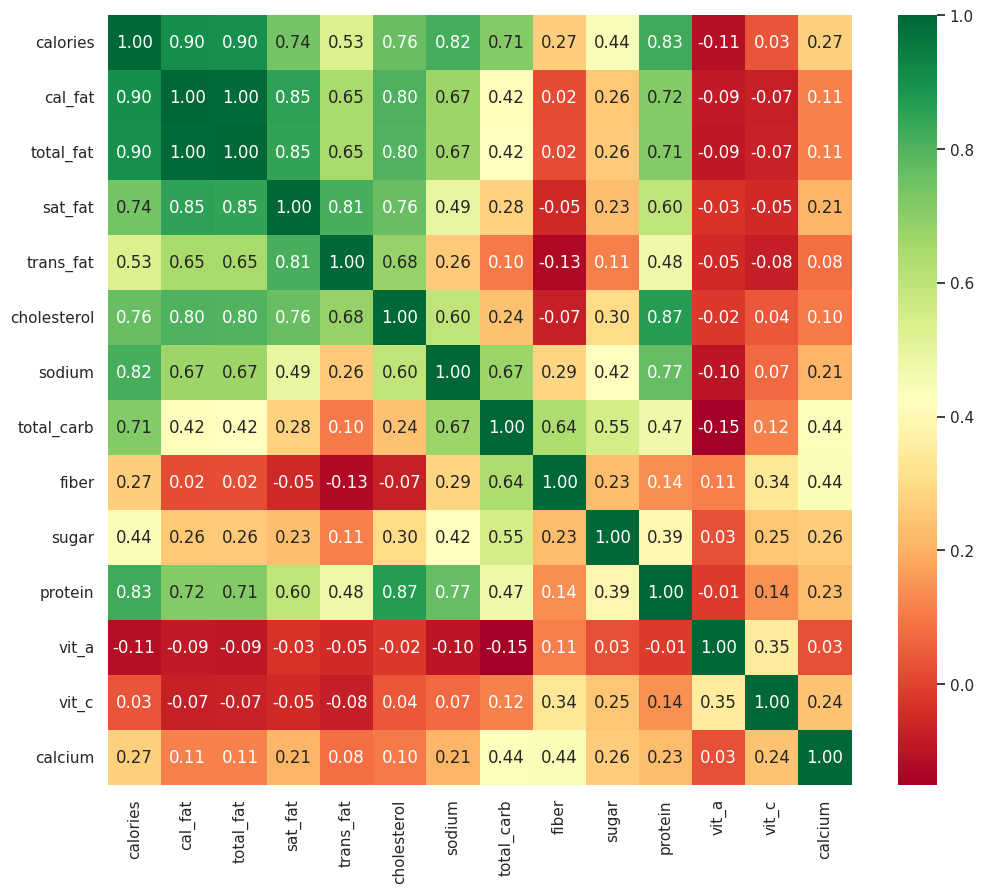

In [ ]:
# heatmap of the same correlation matrix.
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", fmt= '.2f')

**2.  Random Forest Classifier Feature Importance**

In [ ]:
from sklearn.model_selection import train_test_split
X = data_norm.drop(columns = ['calories'])
y = data_norm['calories']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train has categorical columns
label_encoder = LabelEncoder()

for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])

# Now, you can fit the model
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Text(0.5, 0, 'Feature Importance')

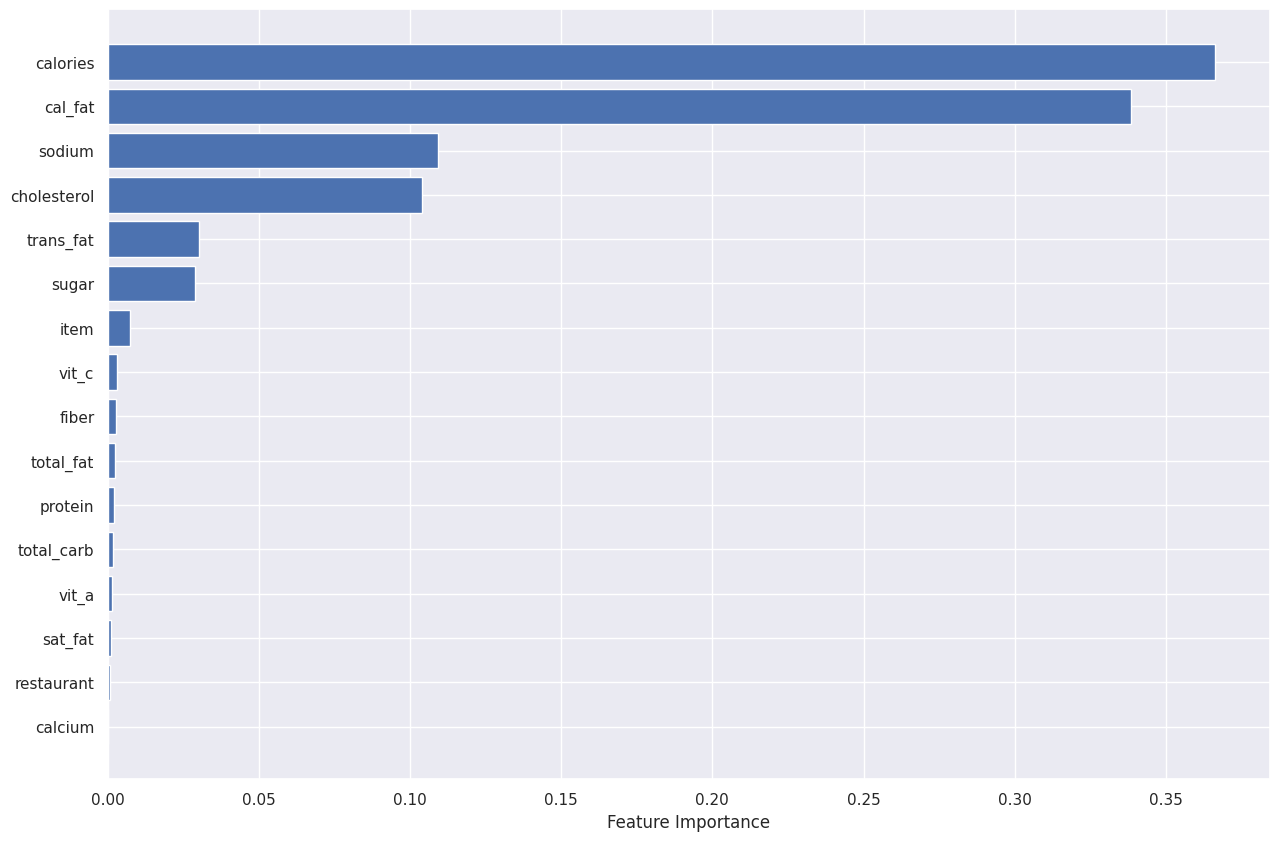

In [ ]:
plt.figure(figsize=(15,10))
sort = forest.feature_importances_.argsort()
plt.barh(data_norm.columns[sort], forest.feature_importances_[sort])
plt.xlabel("Feature Importance")

**3.SHAP**

In [ ]:
%%time
%time
explainer = shap.TreeExplainer(forest)
%time
shap_values = explainer.shap_values(X_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 154 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs
CPU times: user 2.59 s, sys: 21.2 ms, total: 2.62 s
Wall time: 5.15 s


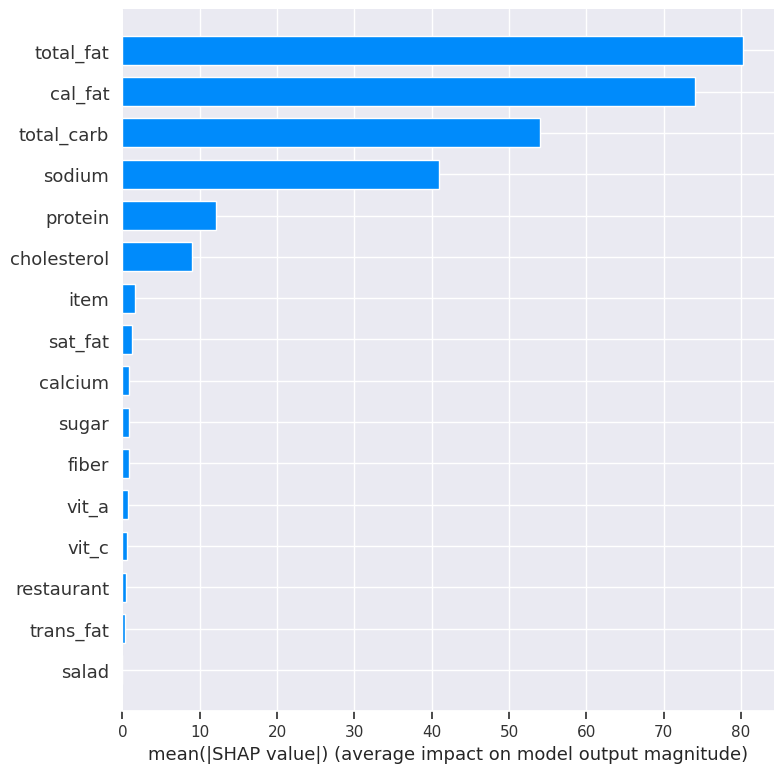

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=X.columns, plot_type='bar')

**Answer** : Based on these we conlude to use the following independent variables as most important feature to train the model.

['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']

# Question 6: Do the training and test sets have the same data?

In [ ]:
X_train[0:10]

restaurant  item   cal_fat  total_fat  sat_fat  trans_fat  cholesterol  \
234           1    70  0.368504   0.368794     14.0        0.5          110   
384           6   302  0.161417   0.163121      9.0        1.0           50   
60            2     0  0.042520   0.042553      3.0        0.0           25   
110           5   128  0.173228   0.170213      4.0        0.0           35   
409           7    92  0.094488   0.092199      5.0        0.0           30   
420           7   306  0.220472   0.219858     11.0        0.5           65   
29            4   216  0.141732   0.141844      5.0        0.0          115   
274           3   134  0.141732   0.141844      8.0        1.0           40   
302           3   277  0.000000   0.000000      0.0        0.0            0   
26            4   258  0.157480   0.156028      4.0        0.0           45   

       sodium  total_carb  fiber  sugar   protein      vit_a      vit_c  \
234  0.343776    0.365385   2.38      9  0.178378  16.676247  15.561371   
384  0.208574    0.070513   4.00      6  0.075676  50.000000  50.000000   
60   0.050289    0.038462   0.00      1  0.054054   0.000000   0.000000   
110  0.119538    0.275641   1.00      4  0.097297   0.000000   0.000000   
409  0.177246    0.333333   7.00      5  0.086486  11.850000   4.540000   
420  0.230008    0.410256   3.00      4  0.129730  11.850000   4.540000   
29   0.253092    0.358974   4.00     14  0.216216  20.000000  25.000000   
274  0.170651    0.153846   1.00      5  0.064865   8.000000   0.000000   
302  0.000000    0.032051   2.00      3  0.000000  50.000000  30.000000   
26   0.162407    0.378205   3.00     13  0.129730   6.000000  10.000000   

       calcium  salad  
234  23.925034      0  
384   8.000000      0  
60    2.000000      0  
110   4.000000      0  
409  24.810000      0  
420  24.810000      0  
29   30.000000      0  
274   6.000000      0  
302  15.000000      0  
26   20.000000      0

In [ ]:
X_test[0:10]

restaurant                             item   cal_fat  total_fat  \
304       Subway                        6" B.L.T.  0.062992   0.063830   
499    Taco Bell                    Mexican Pizza  0.212598   0.219858   
441    Taco Bell  Spicy Sweet Double Stacked Taco  0.125984   0.127660   
153        Arbys                       Greek Gyro  0.307087   0.312057   
501    Taco Bell                  Steak Quesalupa  0.165354   0.163121   
131        Sonic       All Beef New York Dog – 6"  0.133858   0.134752   
204  Burger King          Extra Long Cheeseburger  0.236220   0.234043   
510    Taco Bell   Spicy Triple Double Crunchwrap  0.267717   0.269504   
325       Subway            6" Corned Beef Reuben  0.102362   0.106383   
247  Burger King               Crispy Chicken Jr.  0.196850   0.198582   

     sat_fat  trans_fat  cholesterol    sodium  total_carb  fiber  sugar  \
304      4.0        0.0           20  0.109646    0.275641    5.0      6   
499      8.0        1.0           40  0.139324    0.301282    7.0      2   
441      7.0        0.0           35  0.103050    0.205128    4.0      6   
153     13.0        0.0           75  0.221764    0.352564    4.0      6   
501     10.0        0.5           60  0.136026    0.230769    3.0      3   
131      7.0        0.0           40  0.203627    0.192308    3.0      4   
204     13.0        1.5           85  0.167354    0.288462    2.0      9   
510     10.0        0.5           50  0.302556    0.557692    9.0      8   
325      4.5        0.0           85  0.289365    0.288462    7.0     12   
247      4.5        0.0           30  0.122836    0.217949    2.0      4   

      protein      vit_a      vit_c    calcium  salad  
304  0.075676   8.000000   8.000000  30.000000  Other  
499  0.102703  11.850000   4.540000  24.810000  Other  
441  0.059459  10.000000   2.000000  15.000000  Other  
153  0.118919  12.560000   8.400000  17.360000  Other  
501  0.113514  15.000000   6.000000  35.000000  Other  
131  0.064865   2.000000  10.000000   8.000000  Other  
204  0.135135  16.676247  15.561371  23.925034  Other  
510  0.118919  20.000000  10.000000  25.000000  Other  
325  0.205405  10.000000  35.000000  20.000000  Other  
247  0.059459  16.676247  15.561371  23.925034  Other

In [ ]:
y_train[0:10]

234    830
384    310
60     120
110    450
409    390
420    630
29     560
274    330
302     20
26     530
Name: calories, dtype: int64

In [ ]:
y_test[0:10]

304    320
499    540
441    340
153    710
501    440
131    340
204    580
510    780
325    470
247    430
Name: calories, dtype: int64

In [ ]:
#comparing datasets
same_X_data = X_train.equals(X_test)
same_y_data = y_train.equals(y_test)


if same_X_data or same_y_data:
    print("Training and test sets have the same data")
else:
    print("Training and test sets have different data")

Training and test sets have different data


#  Question 7: In the predictor variables independent of all the other predictor variables?

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


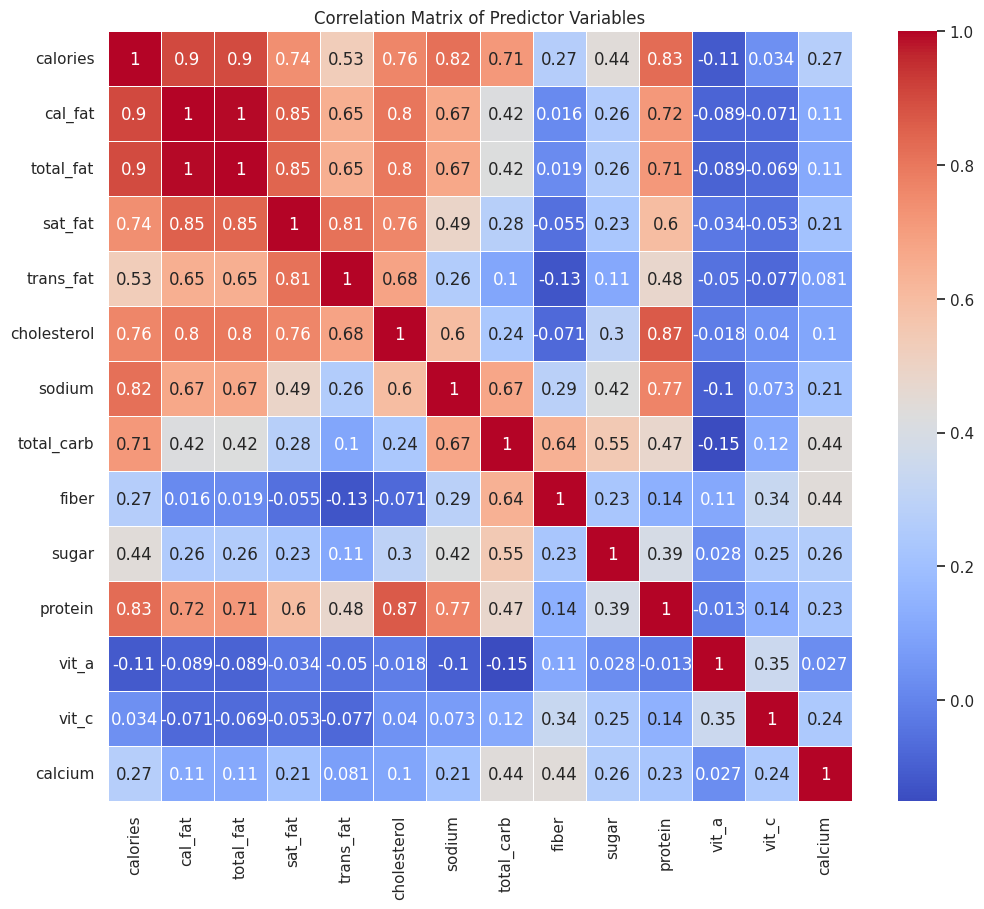

             calories   cal_fat  total_fat   sat_fat  trans_fat  cholesterol  \
calories     1.000000  0.901661   0.900494  0.739664   0.530354     0.762460   
cal_fat      0.901661  1.000000   0.995311  0.852150   0.648422     0.803997   
total_fat    0.900494  0.995311   1.000000  0.846716   0.648821     0.801352   
sat_fat      0.739664  0.852150   0.846716  1.000000   0.812126     0.764030   
trans_fat    0.530354  0.648422   0.648821  0.812126   1.000000     0.680858   
cholesterol  0.762460  0.803997   0.801352  0.764030   0.680858     1.000000   
sodium       0.817855  0.670458   0.669182  0.487456   0.261466     0.596164   
total_carb   0.712701  0.419373   0.422543  0.276534   0.100284     0.238728   
fiber        0.267163  0.015571   0.019156 -0.054887  -0.126234    -0.071500   
sugar        0.437711  0.255485   0.259370  0.234218   0.112651     0.298259   
protein      0.827674  0.715149   0.714259  0.598707   0.475384     0.866955   
vit_a       -0.113192 -0.088610  -0.0893

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of Predictor Variables")
plt.show()
print(correlation_matrix)

Observations:

At first glance we can see that that the variables have less collinearity.

In [ ]:
independence = (correlation_matrix.abs() < 0.1).all().all()

if independence:
    print("The predictor variables are independent of all the other predictor variables.")
else:
    print("The predictor variables are not independent of all the other predictor variables.")

The predictor variables are not independent of all the other predictor variables.


# Question 8: Which predictor variables are the most important?

Mean Squared Error: 8668.320388349515

Top 10 most important features:

                        Feature  Importance
1                     total_fat    0.428819
0                       cal_fat    0.259725
6                    total_carb    0.142696
5                        sodium    0.062633
4                   cholesterol    0.049309
9                       protein    0.033637
511  item_Ultimate Chicken Club    0.009949
8                         sugar    0.001876
2                       sat_fat    0.001826
7                         fiber    0.001759


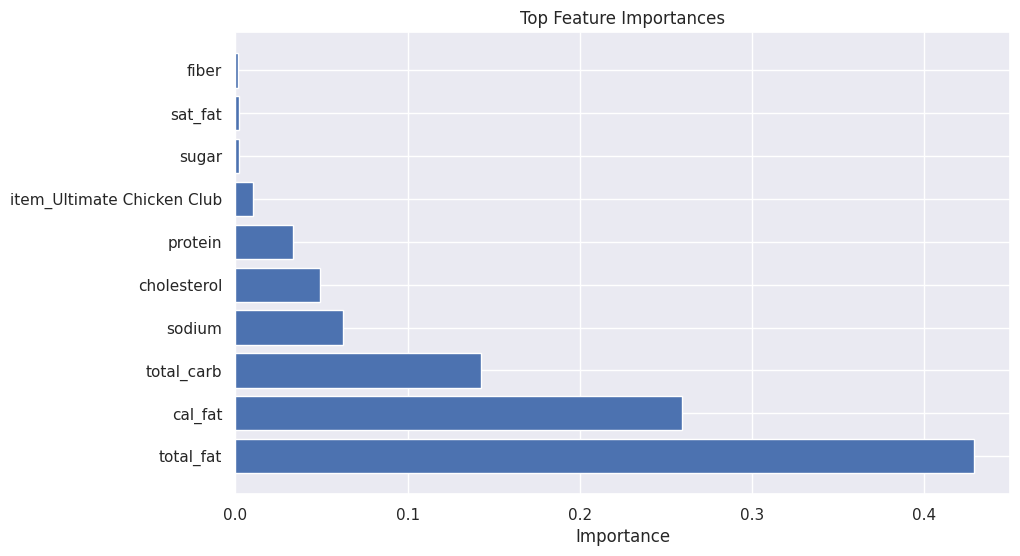

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/SaiPranaviJeedigunta/DEMG_assignments/main/DSEM_0022415588/fastfood.csv"
df = pd.read_csv(url)

# Assuming the target variable is 'Sales' (replace it with your actual target variable)
target_variable = 'calories'

# Drop non-numeric columns and the target variable to get the predictor variables
X = df.drop([target_variable], axis=1)

# Extract the target variable
y = df[target_variable]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_imputed.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # Change this to the desired number of top features
print(f"\nTop {top_n} most important features:\n")
print(feature_importance_df.head(top_n))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.show()



**Answer**: Based on the correlation Matrix we can conclude that the predictor variables above the value of 0.5 are the most important: calories, cal_fat, total_fat, protein, sodium and total_carb.

# Question 10: What are the distributions of the predictor variables?   

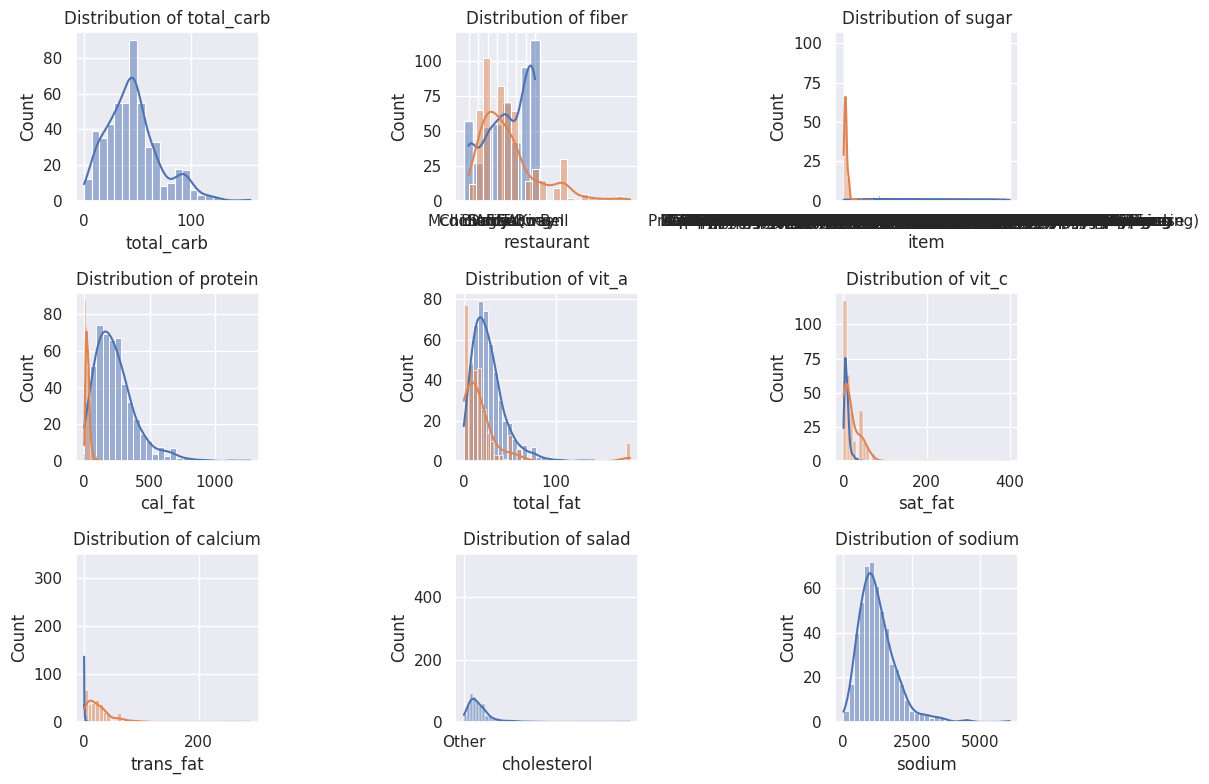

In [ ]:
# Plot histograms for each predictor variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i % 9 + 1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Question 11: Remove outliers and keep outliers (does if have an effect of the final predictive model)?


*  Mean Squared Error (MSE) with original data (including outliers): 110159.22330097087
*   Mean Squared Error (MSE) after removing outliers: 83296.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy import stats

# Assuming you have a DataFrame named 'data'
# Replace the DataFrame and column names with your actual dataset and columns
independent_variables = ['total_fat', 'cal_fat', 'total_carb', 'sodium', 'protein']
target_variable = 'calories'

# Method 1: Train the model with original data (including outliers)
X = data[independent_variables]
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_original = LogisticRegression(max_iter=1000)  # Increased max_iter
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Method 2: Remove outliers and train the model
# Define a function to remove outliers using modified Z-score method
def remove_outliers(df, cols, threshold=3):
    z_scores = stats.zscore(df[cols])
    df_outliers_removed = df[(z_scores < threshold).all(axis=1)]
    return df_outliers_removed

# Remove outliers from the independent variables
data_no_outliers = remove_outliers(data, independent_variables)

# Split the data into training and test sets
X_no_outliers = data_no_outliers[independent_variables]
y_no_outliers = data_no_outliers[target_variable]
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Train the model without outliers
model_no_outliers = LogisticRegression(max_iter=1000)  # Increased max_iter
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)
accuracy_no_outliers = accuracy_score(y_test_no_outliers, y_pred_no_outliers)

# Compare the performance of both models
print("Mean Squared Error (MSE) with original data (including outliers):", mse_original)
print("Mean Squared Error (MSE) after removing outliers:", mse_no_outliers)

# Compare the performance of both models
print("Accuracy with original data (including outliers):", accuracy_original)
print("Accuracy after removing outliers:", accuracy_no_outliers)


Mean Squared Error (MSE) with original data (including outliers): 110159.22330097087
Mean Squared Error (MSE) after removing outliers: 83296.0
Accuracy with original data (including outliers): 0.019417475728155338
Accuracy after removing outliers: 0.02


# Question 12: Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Removing 1% data:

In [ ]:
p = 0.01
mask = np.random.choice([True, False], size=data.shape, p=[p,1-p])
nan_1p_df = data.mask(mask)

In [ ]:
nan_1p_df.info()
#We can see 1% data is made null as non null values are not same as total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   507 non-null    object 
 1   item         510 non-null    object 
 2   calories     512 non-null    float64
 3   cal_fat      512 non-null    float64
 4   total_fat    510 non-null    float64
 5   sat_fat      513 non-null    float64
 6   trans_fat    510 non-null    float64
 7   cholesterol  510 non-null    float64
 8   sodium       507 non-null    float64
 9   total_carb   511 non-null    float64
 10  fiber        509 non-null    float64
 11  sugar        509 non-null    float64
 12  protein      510 non-null    float64
 13  vit_a        512 non-null    float64
 14  vit_c        509 non-null    float64
 15  calcium      510 non-null    float64
 16  salad        513 non-null    object 
dtypes: float64(14), object(3)
memory usage: 68.5+ KB


Removing 5% data

In [ ]:
p = 0.05
mask = np.random.choice([True, False], size=data.shape, p=[p,1-p])
nan_5p_df = data.mask(mask)
nan_5p_df.info()
#We can see 5% data is made null as non null values are not same as total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   492 non-null    object 
 1   item         485 non-null    object 
 2   calories     496 non-null    float64
 3   cal_fat      488 non-null    float64
 4   total_fat    490 non-null    float64
 5   sat_fat      486 non-null    float64
 6   trans_fat    487 non-null    float64
 7   cholesterol  481 non-null    float64
 8   sodium       490 non-null    float64
 9   total_carb   486 non-null    float64
 10  fiber        495 non-null    float64
 11  sugar        489 non-null    float64
 12  protein      489 non-null    float64
 13  vit_a        490 non-null    float64
 14  vit_c        484 non-null    float64
 15  calcium      488 non-null    float64
 16  salad        483 non-null    object 
dtypes: float64(14), object(3)
memory usage: 68.5+ KB


10% Data removal

In [ ]:
p = 0.1
mask = np.random.choice([True, False], size=data.shape, p=[p,1-p])
nan_10p_df = data.mask(mask)
print(nan_10p_df.info())
#We can see 10% data is made null as non null values are not same as total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   456 non-null    object 
 1   item         467 non-null    object 
 2   calories     465 non-null    float64
 3   cal_fat      458 non-null    float64
 4   total_fat    460 non-null    float64
 5   sat_fat      451 non-null    float64
 6   trans_fat    477 non-null    float64
 7   cholesterol  460 non-null    float64
 8   sodium       467 non-null    float64
 9   total_carb   456 non-null    float64
 10  fiber        472 non-null    float64
 11  sugar        465 non-null    float64
 12  protein      463 non-null    float64
 13  vit_a        458 non-null    float64
 14  vit_c        462 non-null    float64
 15  calcium      462 non-null    float64
 16  salad        458 non-null    object 
dtypes: float64(14), object(3)
memory usage: 68.5+ KB
None


**Data Imputation**

1. With Mean values

In [ ]:
nan_10p_df_mean = nan_10p_df.fillna(nan_10p_df.mean())
nan_1p_df_mean = nan_1p_df.fillna(nan_1p_df.mean())
nan_5p_df_mean = nan_5p_df.fillna(nan_5p_df.mean())

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


2. Dropping these Nan values

In [ ]:
nan_10p_df_drop = nan_10p_df.dropna()
print('nan_10p_df_drop shape:',nan_10p_df_drop.shape)
nan_1p_df_drop = nan_1p_df.dropna()
print('nan_1p_df_drop shape:',nan_1p_df_drop.shape)
nan_5p_df_drop = nan_5p_df.dropna()
print('nan_5p_df_drop shape:',nan_5p_df_drop.shape)

nan_10p_df_drop shape: (79, 17)
nan_1p_df_drop shape: (436, 17)
nan_5p_df_drop shape: (210, 17)


3. Fill with KNN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'nan_1p_df', 'nan_5p_df', and 'nan_10p_df' are your DataFrames with missing values

def impute_knn(impute_df, imputer, encoder):
    # Separate numerical and categorical columns
    numerical_cols = impute_df.select_dtypes(include=['number']).columns
    categorical_cols = impute_df.select_dtypes(include=['object']).columns

    # Create a copy of the DataFrame
    impute_df_copy = impute_df.copy()

    # Convert categorical columns to numerical using OrdinalEncoder
    impute_df_copy[categorical_cols] = encoder.fit_transform(impute_df[categorical_cols])

    # Apply KNNImputer
    Xtrans = imputer.fit_transform(impute_df_copy)

    # Convert back to DataFrame
    res_df = pd.DataFrame(data=Xtrans, columns=impute_df.columns)

    # Convert encoded categorical values back to original format
    res_df[categorical_cols] = encoder.inverse_transform(res_df[categorical_cols].astype(int))

    return res_df

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Apply imputation
nan_1p_df_knn = impute_knn(nan_1p_df, imputer, encoder)
nan_5p_df_knn = impute_knn(nan_5p_df, imputer, encoder)
nan_10p_df_knn = impute_knn(nan_10p_df, imputer, encoder)


**Check how well imputing the mean works**

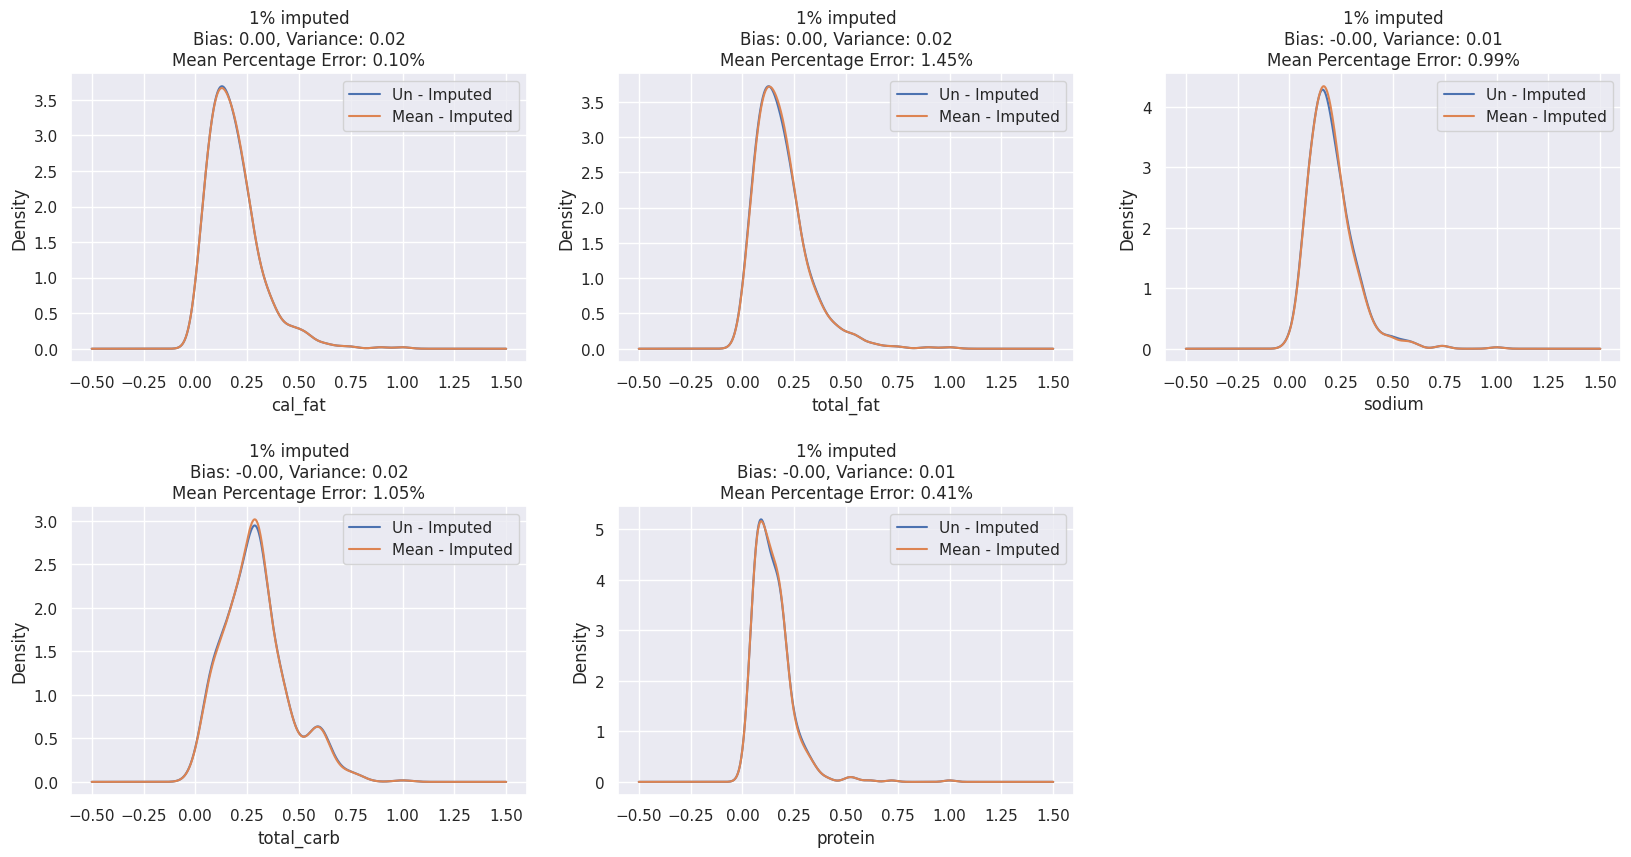

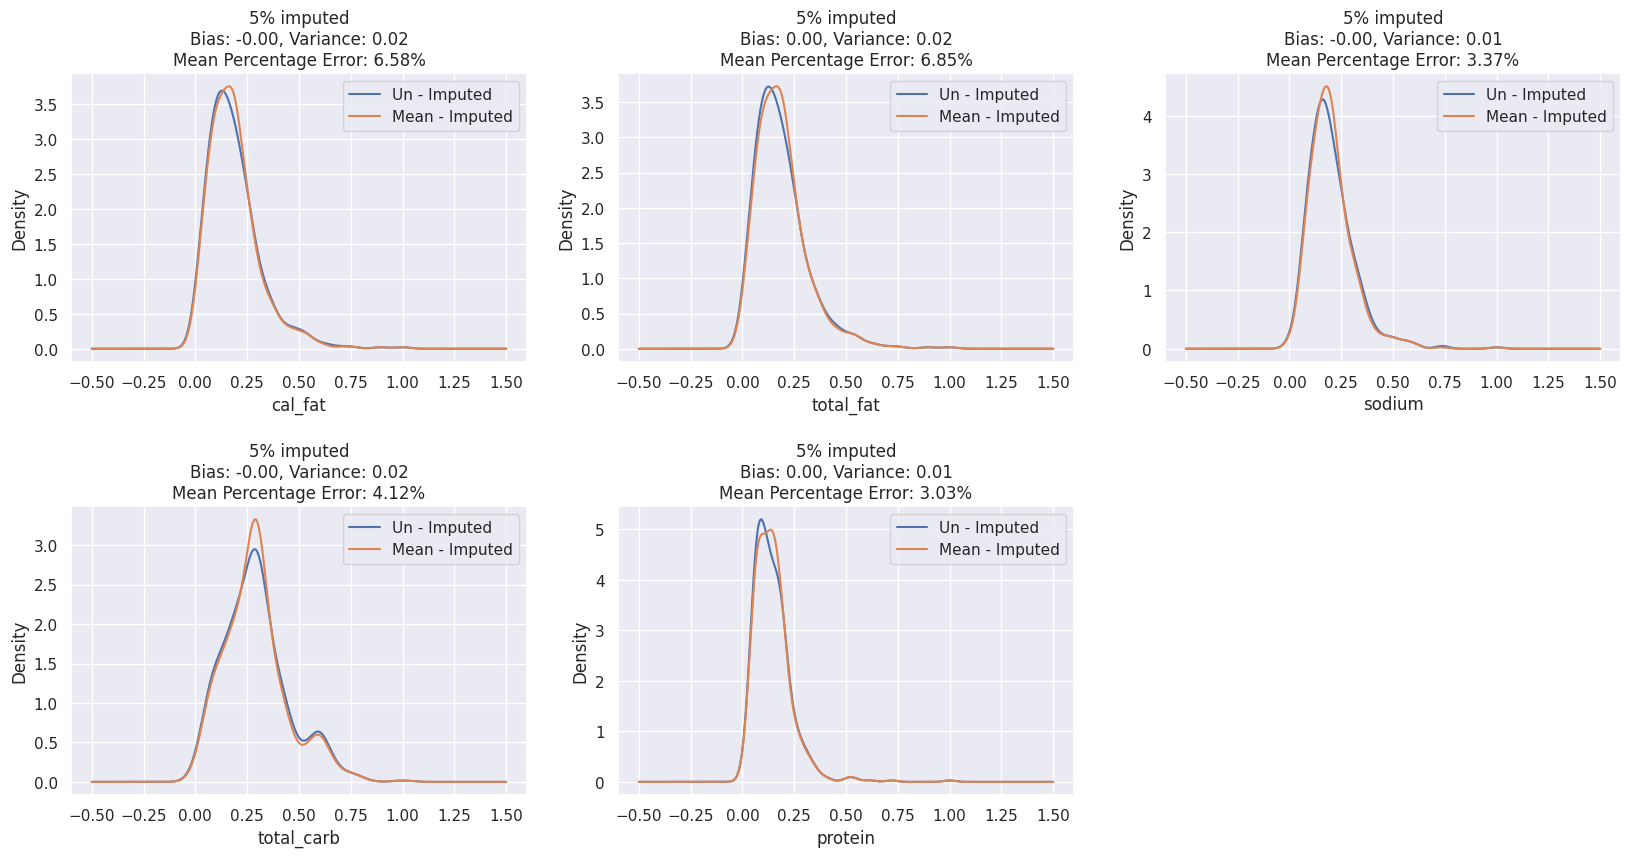

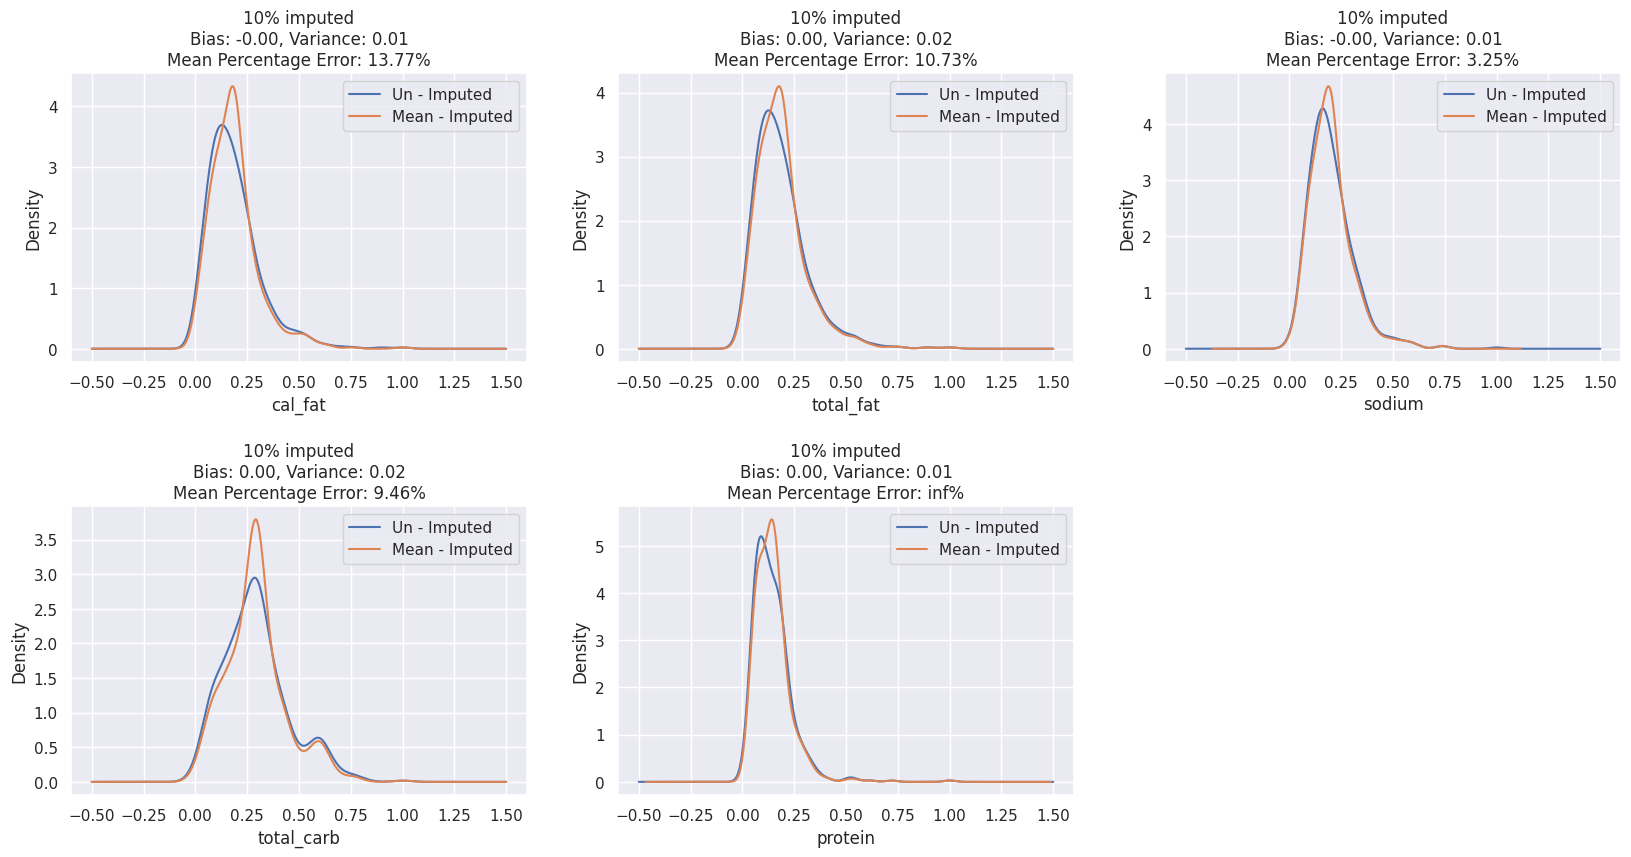

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate bias, variance, and mean percentage error
def calculate_metrics(original, imputed):
    bias = np.mean(imputed - original)
    variance = np.var(imputed)
    mean_percentage_error = np.mean(np.abs((original - imputed) / original)) * 100
    return bias, variance, mean_percentage_error

# Assuming numeric_columns is the list of columns you want to visualize
cols = numeric_columns

# Imputation levels
imputation_levels = [1, 5, 10]

for level in imputation_levels:
    plt.figure(figsize=(20, 15))
    i = 0
    for col in cols[:]:
        plt.subplot(3, 3, i % 9 + 1)
        i += 1

        # Original data
        data[col].plot(kind="kde")

        # Imputed data using mean imputation
        imputed_col = f'nan_{level}p_df_mean'
        globals()[imputed_col][col].plot(kind="kde")

        # Calculate and display metrics
        bias, variance, mean_percentage_error = calculate_metrics(data[col], globals()[imputed_col][col])
        plt.title(f'{level}% imputed\nBias: {bias:.2f}, Variance: {variance:.2f}\nMean Percentage Error: {mean_percentage_error:.2f}%')
        plt.legend(["Un - Imputed", "Mean - Imputed"])
        plt.xlabel(f"{col}")

    # Adjust vertical space between subplots
    plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.show()

**Check how well imputer drop works**

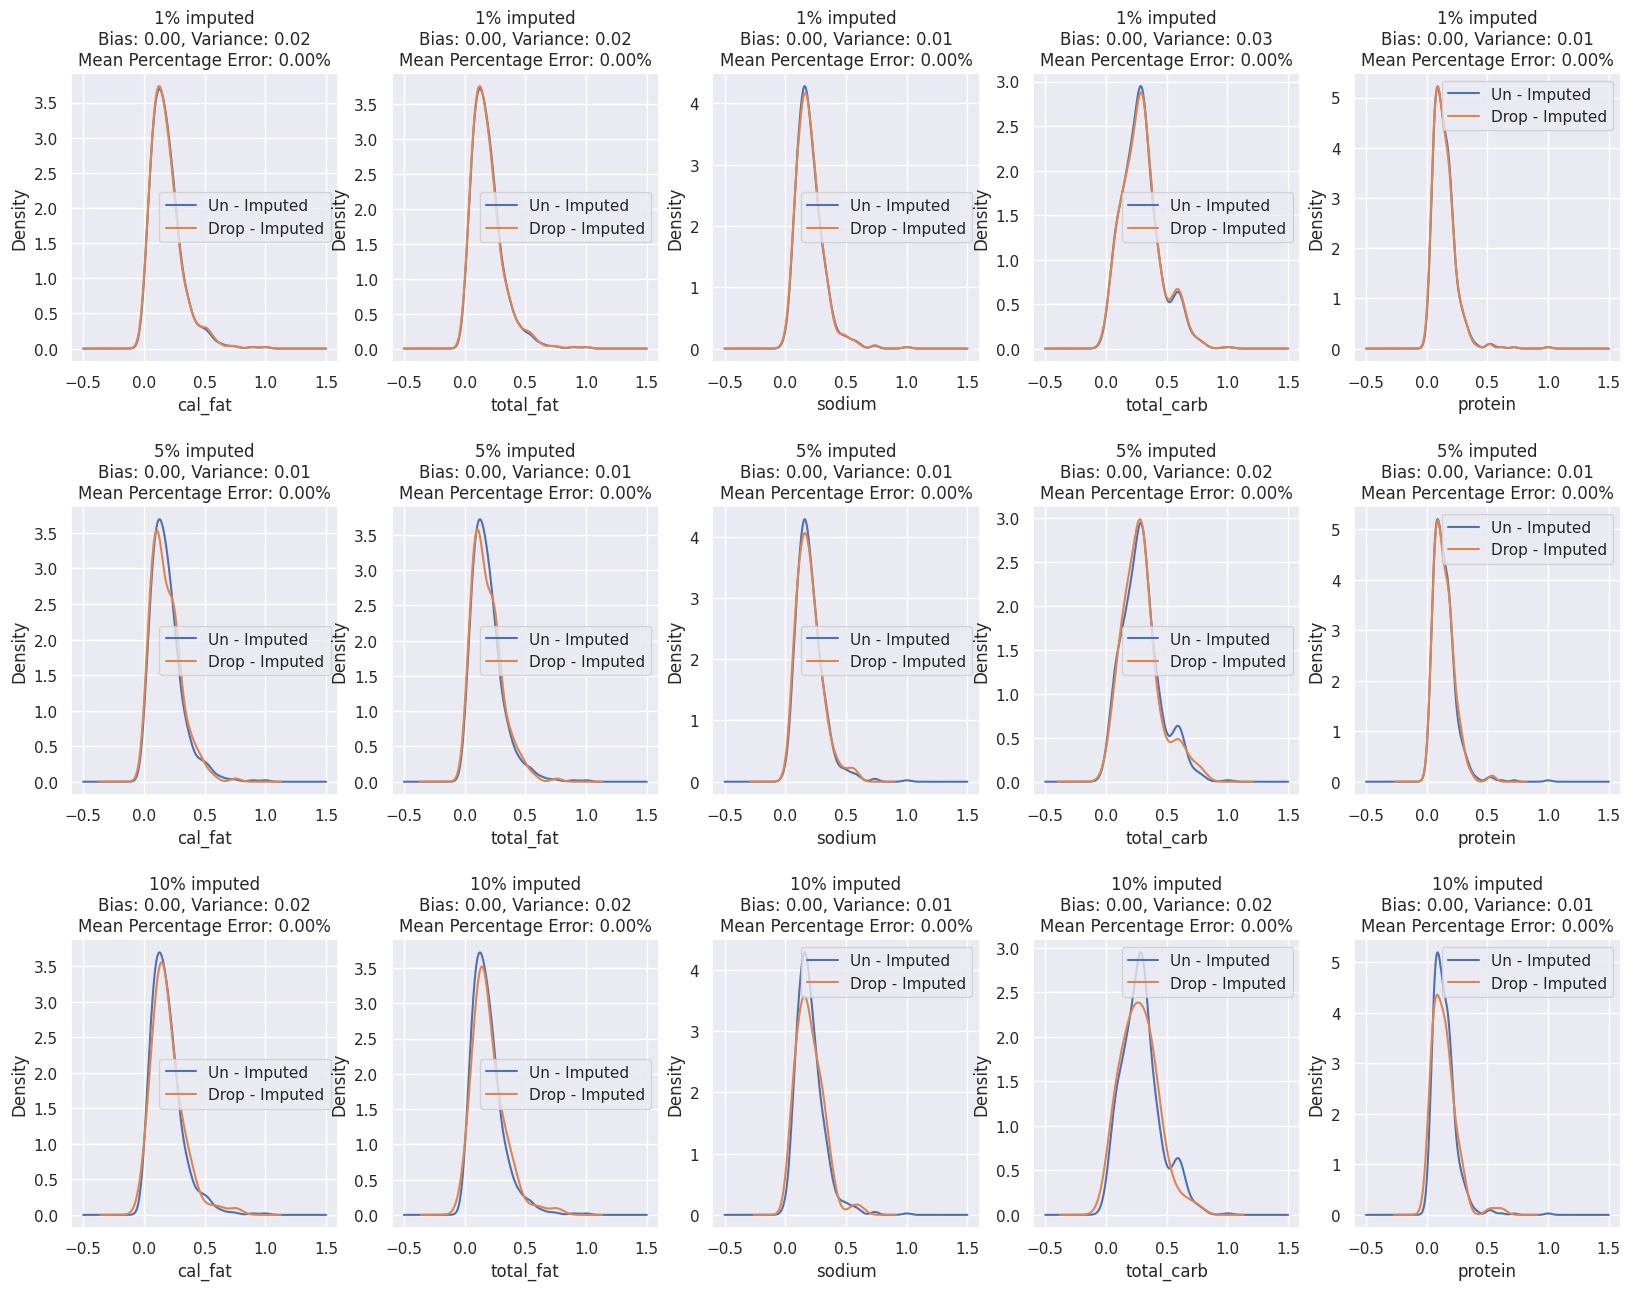

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate bias, variance, and mean percentage error
def calculate_metrics(original, imputed):
    bias = np.mean(imputed - original)
    variance = np.var(imputed)
    mean_percentage_error = np.mean(np.abs((original - imputed) / original)) * 100
    return bias, variance, mean_percentage_error

# Assuming numeric_columns is the list of columns you want to visualize
cols = numeric_columns

# Imputation levels
imputation_levels = [1, 5, 10]

# Increase vertical space between plots
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

i = 1  # Initialize subplot index

for level in imputation_levels:
    for col in cols:
        plt.subplot(3, len(cols), i)
        i += 1

        # Original data
        data[col].plot(kind="kde")

        # Imputed data using drop imputation
        imputed_col = f'nan_{level}p_df_drop'
        globals()[imputed_col][col].plot(kind="kde")

        # Calculate metrics
        bias, variance, mean_percentage_error = calculate_metrics(data[col], globals()[imputed_col][col])

        # Display metrics in the title
        plt.title(f'{level}% imputed\nBias: {bias:.2f}, Variance: {variance:.2f}\nMean Percentage Error: {mean_percentage_error:.2f}%')
        plt.legend(["Un - Imputed", "Drop - Imputed"])
        plt.xlabel(f"{col}")

# Show the plots
plt.show()


**Checking how well impute : KNN**

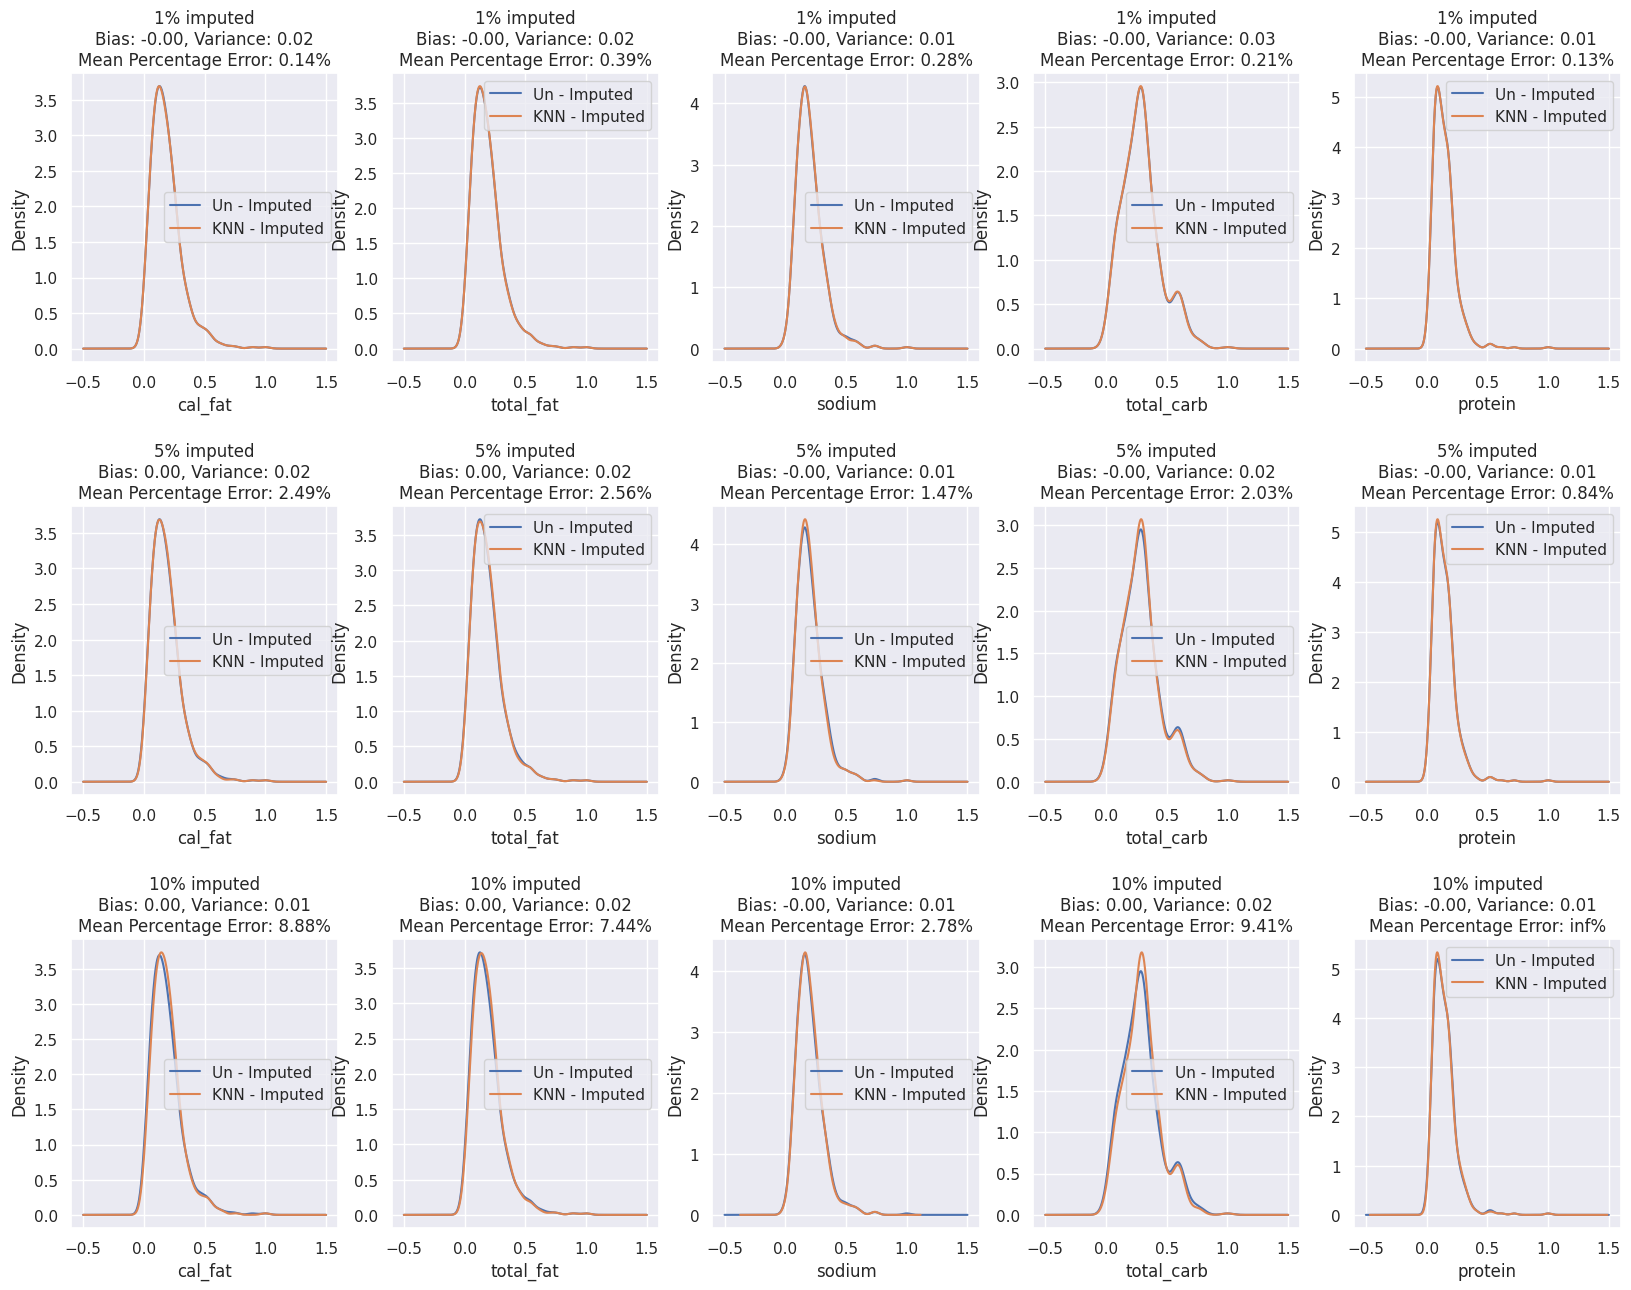

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate bias, variance, and mean percentage error
def calculate_metrics(original, imputed):
    bias = np.mean(imputed - original)
    variance = np.var(imputed)
    mean_percentage_error = np.mean(np.abs((original - imputed) / original)) * 100
    return bias, variance, mean_percentage_error

# Assuming numeric_columns is the list of columns you want to visualize
cols = numeric_columns

# Imputation levels
imputation_levels = [1, 5, 10]

# Increase vertical space between plots
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

i = 1  # Initialize subplot index

for level in imputation_levels:
    for col in cols:
        plt.subplot(3, len(cols), i)
        i += 1

        # Original data
        data[col].plot(kind="kde")

        # Imputed data using KNN imputation
        imputed_col = f'nan_{level}p_df_knn'
        globals()[imputed_col][col].plot(kind="kde")

        # Calculate metrics
        bias, variance, mean_percentage_error = calculate_metrics(data[col], globals()[imputed_col][col])

        # Display metrics in the title
        plt.title(f'{level}% imputed\nBias: {bias:.2f}, Variance: {variance:.2f}\nMean Percentage Error: {mean_percentage_error:.2f}%')
        plt.legend(["Un - Imputed", "KNN - Imputed"])
        plt.xlabel(f"{col}")

# Show the plots
plt.show()

Observation:

1. Looking at the distribution of impujted data we can observe when imputation is less i.e. 1% then any method works fine for my dataset but as the amount increases to 5% and then to 10% taking mean to replace values causes huge variance.

2. Dropping the missing data doesn't affect the distribution much but we lose out on valuable training data which is observed by looking at the shape of imputed dataframe.

# Question 13: For categorical data, calculate the accuracy and a confusion matrix.

In [ ]:
# Select features and target variable
features = ['restaurant','item','salad']
target_variable = 'calories'

X = data[features]
y = data[target_variable]

# Encode categorical variables (assuming they are not already encoded)
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.02912621359223301
Confusion Matrix:
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# MIT License

MIT License

Copyright (c) 2024 SaiPranaviJeedigunta

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# References and Citations

1.Many techniques used in this notebook have been adopted from the following github repositories.
Owner - AI Skunkworks

Link - https://github.com/aiskunks/Skunks_Skool


Author name - Prof Nik Bear Brown

Link - https://github.com/nikbearbrown/

2.Reference has been taken from the seaborn webpage for charts and visualization

Link - https://seaborn.pydata.org

3.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

Link - https://stackoverflow.com

4.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
